Plots to check that everything worked...

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from matplotlib.gridspec import GridSpec
from astropy.units import cds
cds.enable()

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20


In [11]:
path = '/media/david/1tb_storage1/emergency_data/mega_muscles/v01_seds/'

In [14]:
all_seds = glob.glob('{}*multi*.fits'.format(path))
all_seds

['/media/david/1tb_storage1/emergency_data/mega_muscles/v01_seds/hlsp_muscles_multi_multi_gj649_broadband_v1_var-res-sed.fits',
 '/media/david/1tb_storage1/emergency_data/mega_muscles/v01_seds/hlsp_muscles_multi_multi_gj1132_broadband_v1_const-res-sed.fits',
 '/media/david/1tb_storage1/emergency_data/mega_muscles/v01_seds/hlsp_muscles_multi_multi_gj1132_broadband_v1_var-res-sed.fits',
 '/media/david/1tb_storage1/emergency_data/mega_muscles/v01_seds/hlsp_muscles_multi_multi_gj15a_broadband_v1_const-res-sed.fits',
 '/media/david/1tb_storage1/emergency_data/mega_muscles/v01_seds/hlsp_muscles_multi_multi_gj15a_broadband_v1_var-res-sed.fits',
 '/media/david/1tb_storage1/emergency_data/mega_muscles/v01_seds/hlsp_muscles_multi_multi_gj163_broadband_v1_const-res-sed.fits',
 '/media/david/1tb_storage1/emergency_data/mega_muscles/v01_seds/hlsp_muscles_multi_multi_gj163_broadband_v1_var-res-sed.fits',
 '/media/david/1tb_storage1/emergency_data/mega_muscles/v01_seds/hlsp_muscles_multi_multi_gj649_

In [15]:
# names = fits.getdata(all_seds[0], 1).names

In [16]:
# print(len(names))

In [7]:
# done = os.listdir('plots/diagnosis_plots/')
# done

['hlsp_muscles_multi_multi_gj849_broadband_v1_const-res-sed_check.pdf',
 'hlsp_muscles_multi_multi_lhs-2686_broadband_v1_const-res-sed_check.pdf',
 'hlsp_muscles_multi_multi_gj699_broadband_v1_const-res-sed_check.pdf',
 'hlsp_muscles_multi_multi_gj674_broadband_v1_var-res-sed_check.pdf',
 'hlsp_muscles_multi_multi_gj729_broadband_v1_const-res-sed_check.pdf',
 'hlsp_muscles_multi_multi_gj676a_broadband_v1_var-res-sed_check.pdf',
 '.ipynb_checkpoints',
 'hlsp_muscles_multi_multi_gj849_broadband_v1_var-res-sed_check.pdf',
 'hlsp_muscles_multi_multi_trappist-1_broadband_v1_const-res-sed_check.pdf',
 'hlsp_muscles_multi_multi_gj674_broadband_v1_const-res-sed_check.pdf',
 'hlsp_muscles_multi_multi_l-980-5_broadband_v1_var-res-sed_check.pdf',
 'hlsp_muscles_multi_multi_gj649_broadband_v1_const-res-sed_check.pdf',
 'hlsp_muscles_multi_multi_gj163_broadband_v1_var-res-sed_check.pdf',
 'hlsp_muscles_multi_multi_trappist-1_broadband_v1_var-res-sed_check.pdf',
 'hlsp_muscles_multi_multi_gj699_broa

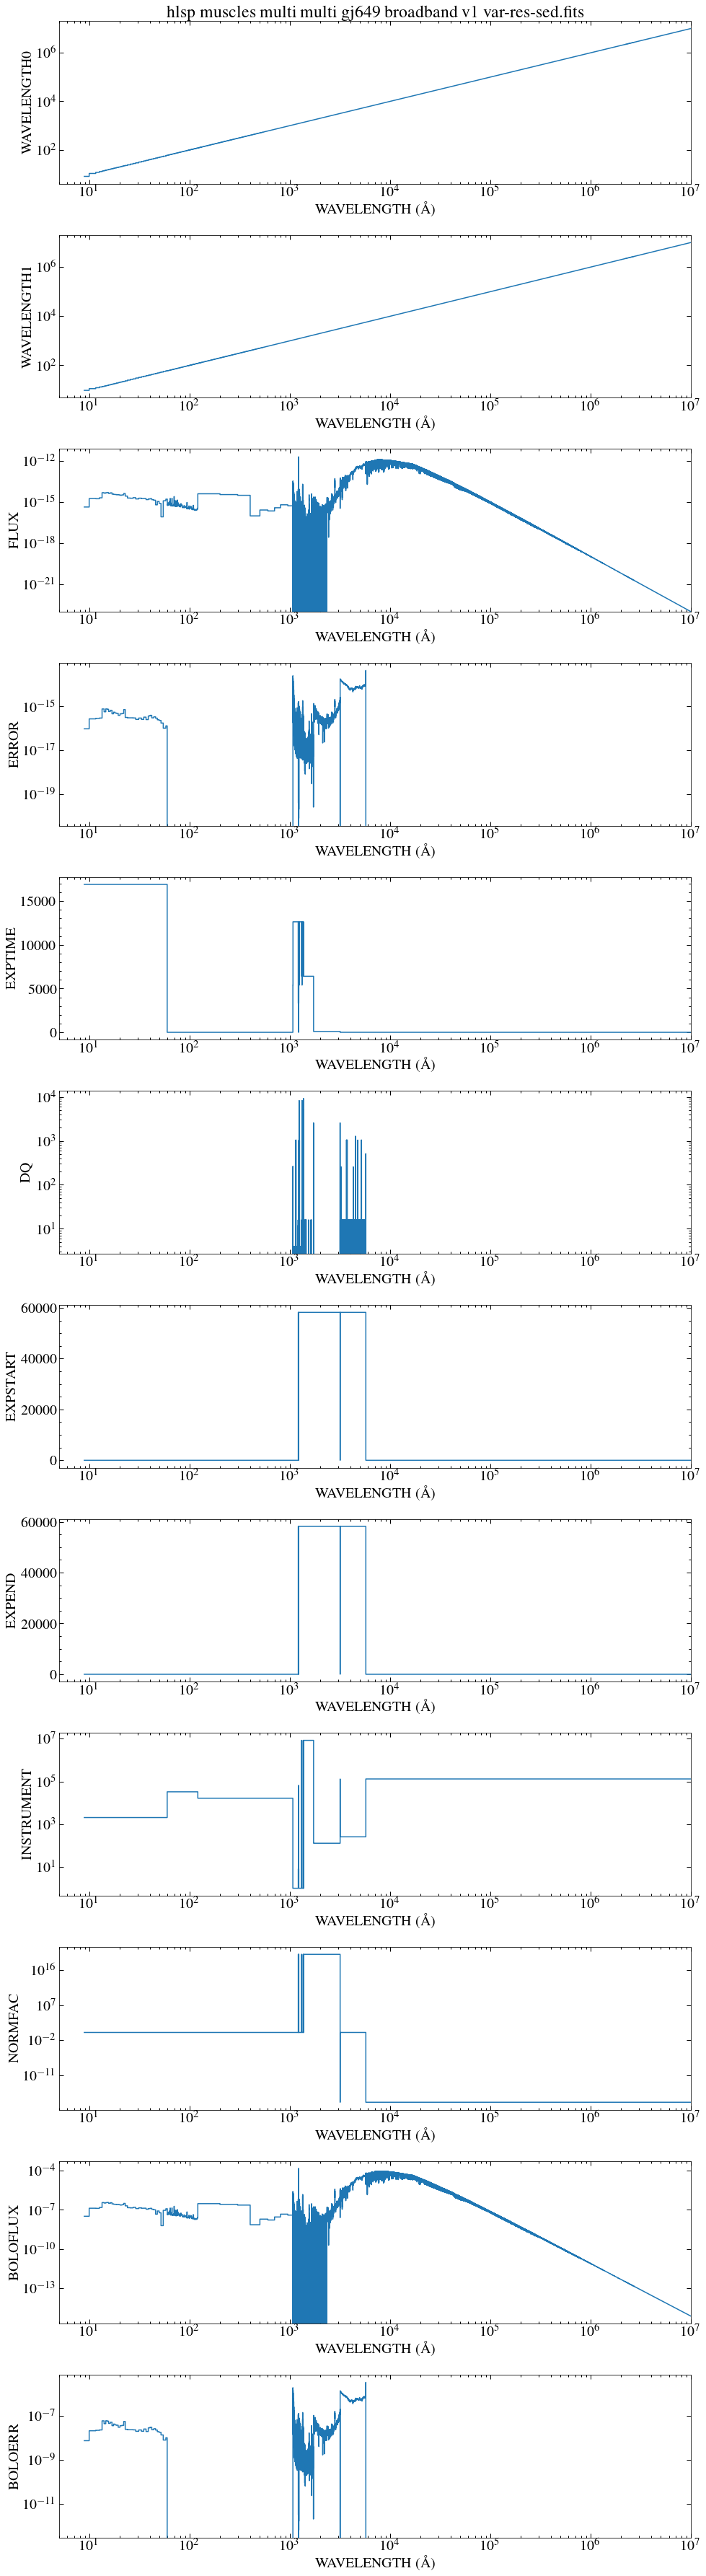

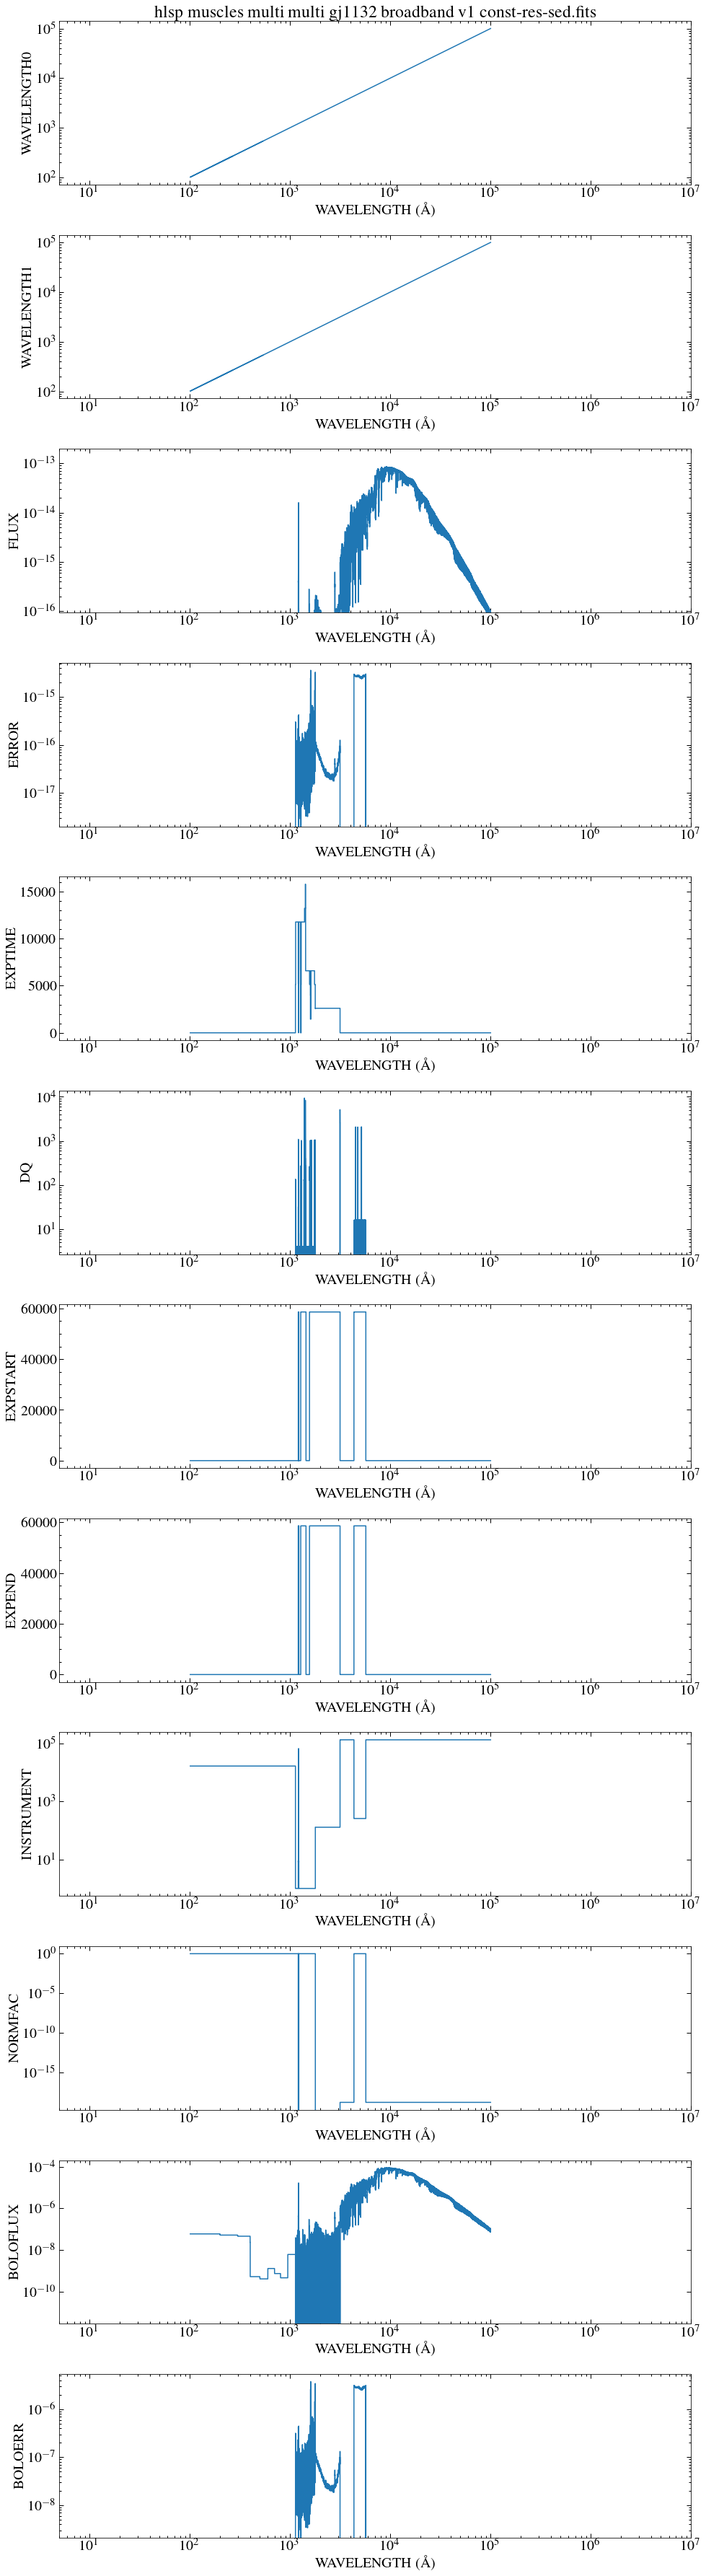

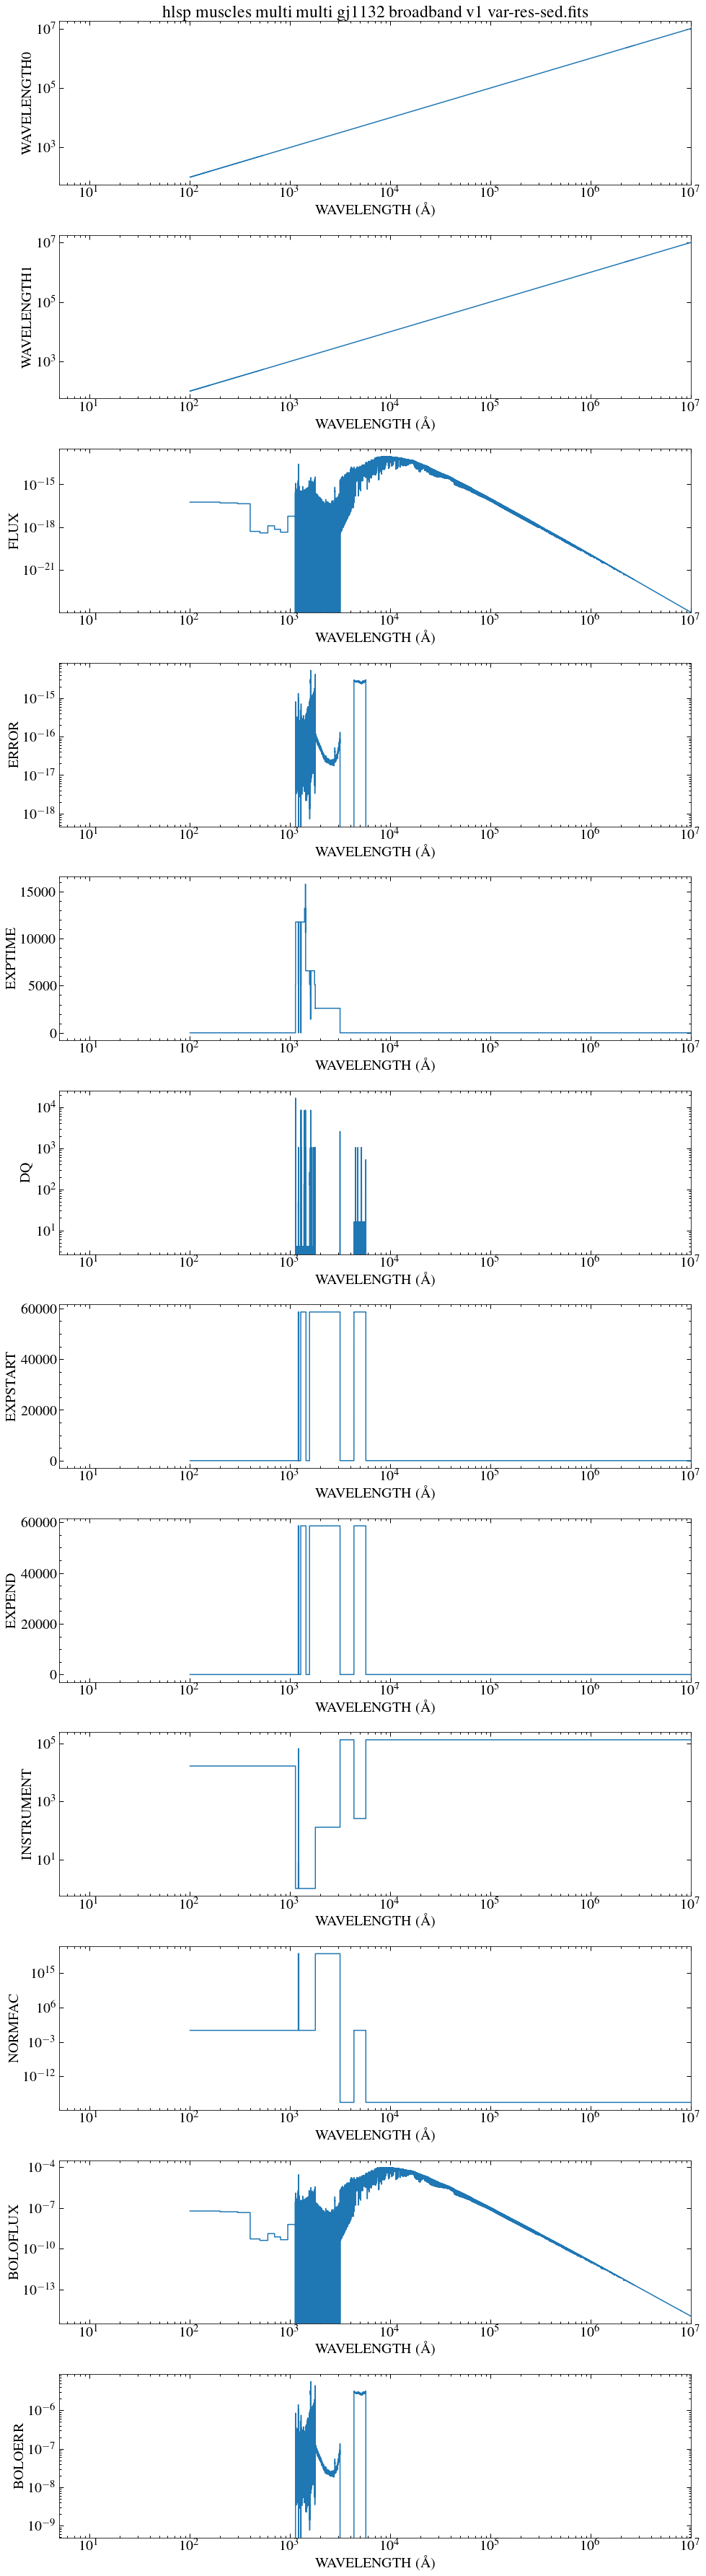

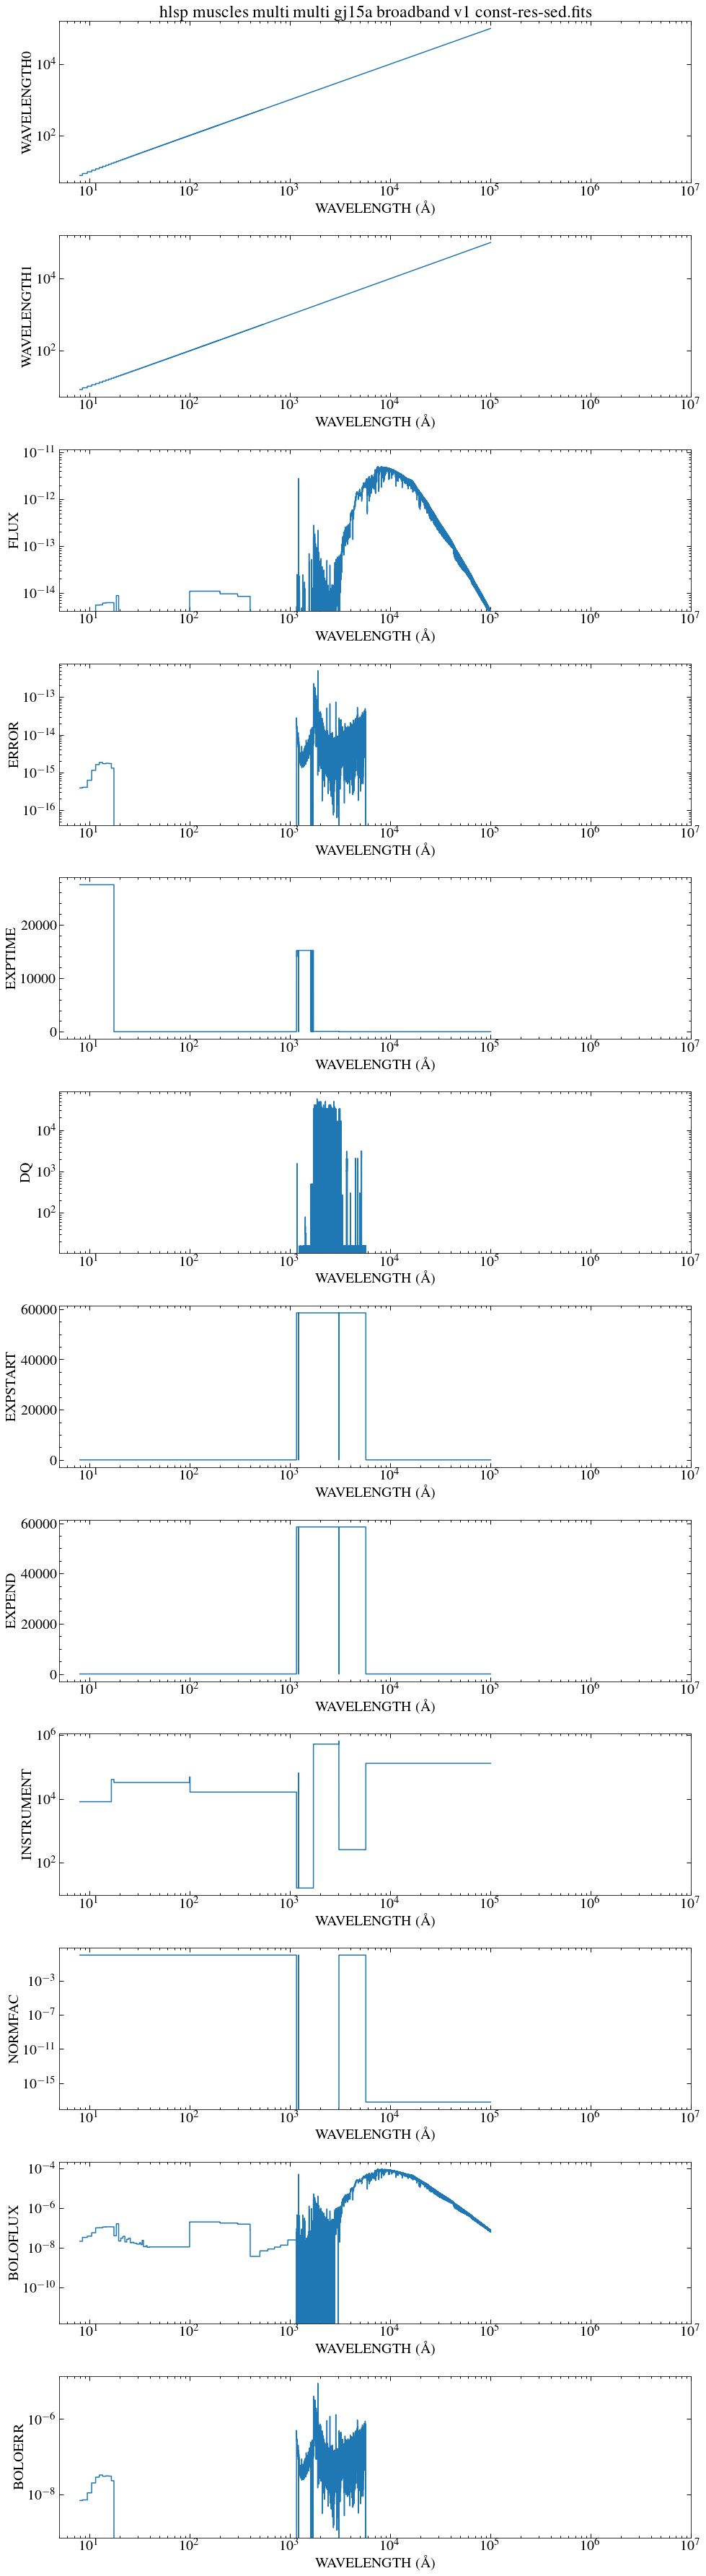

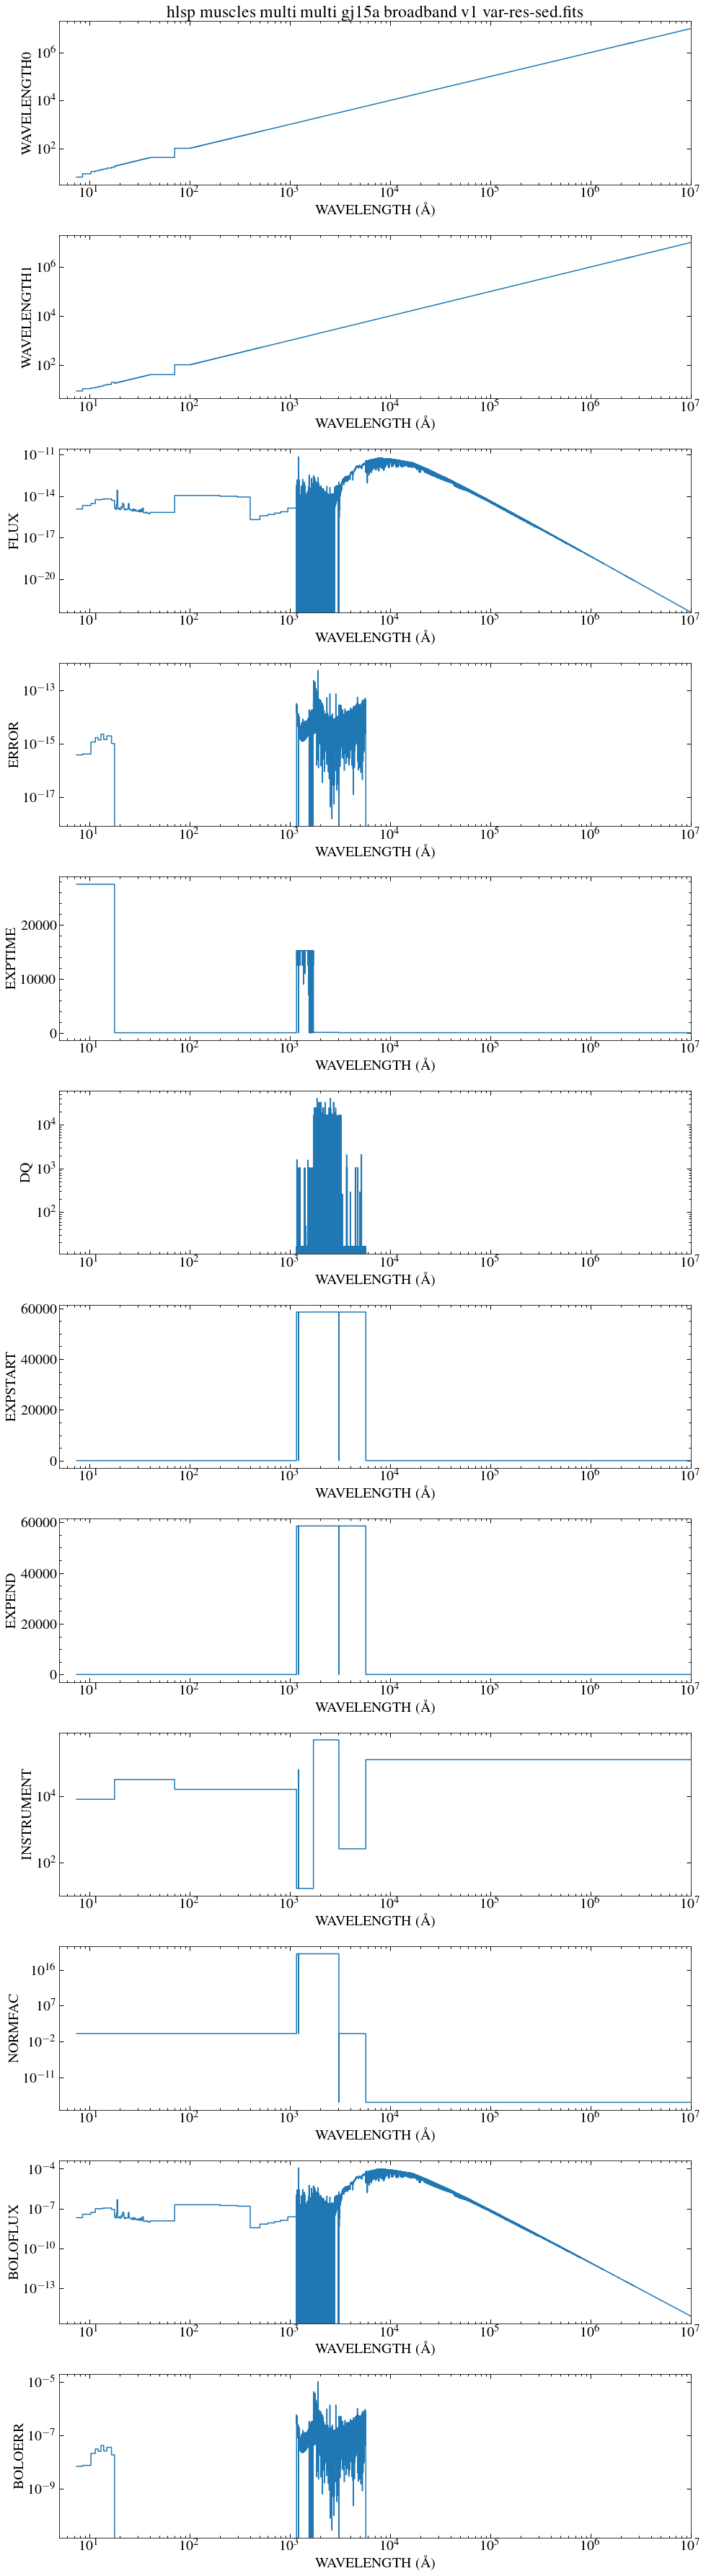

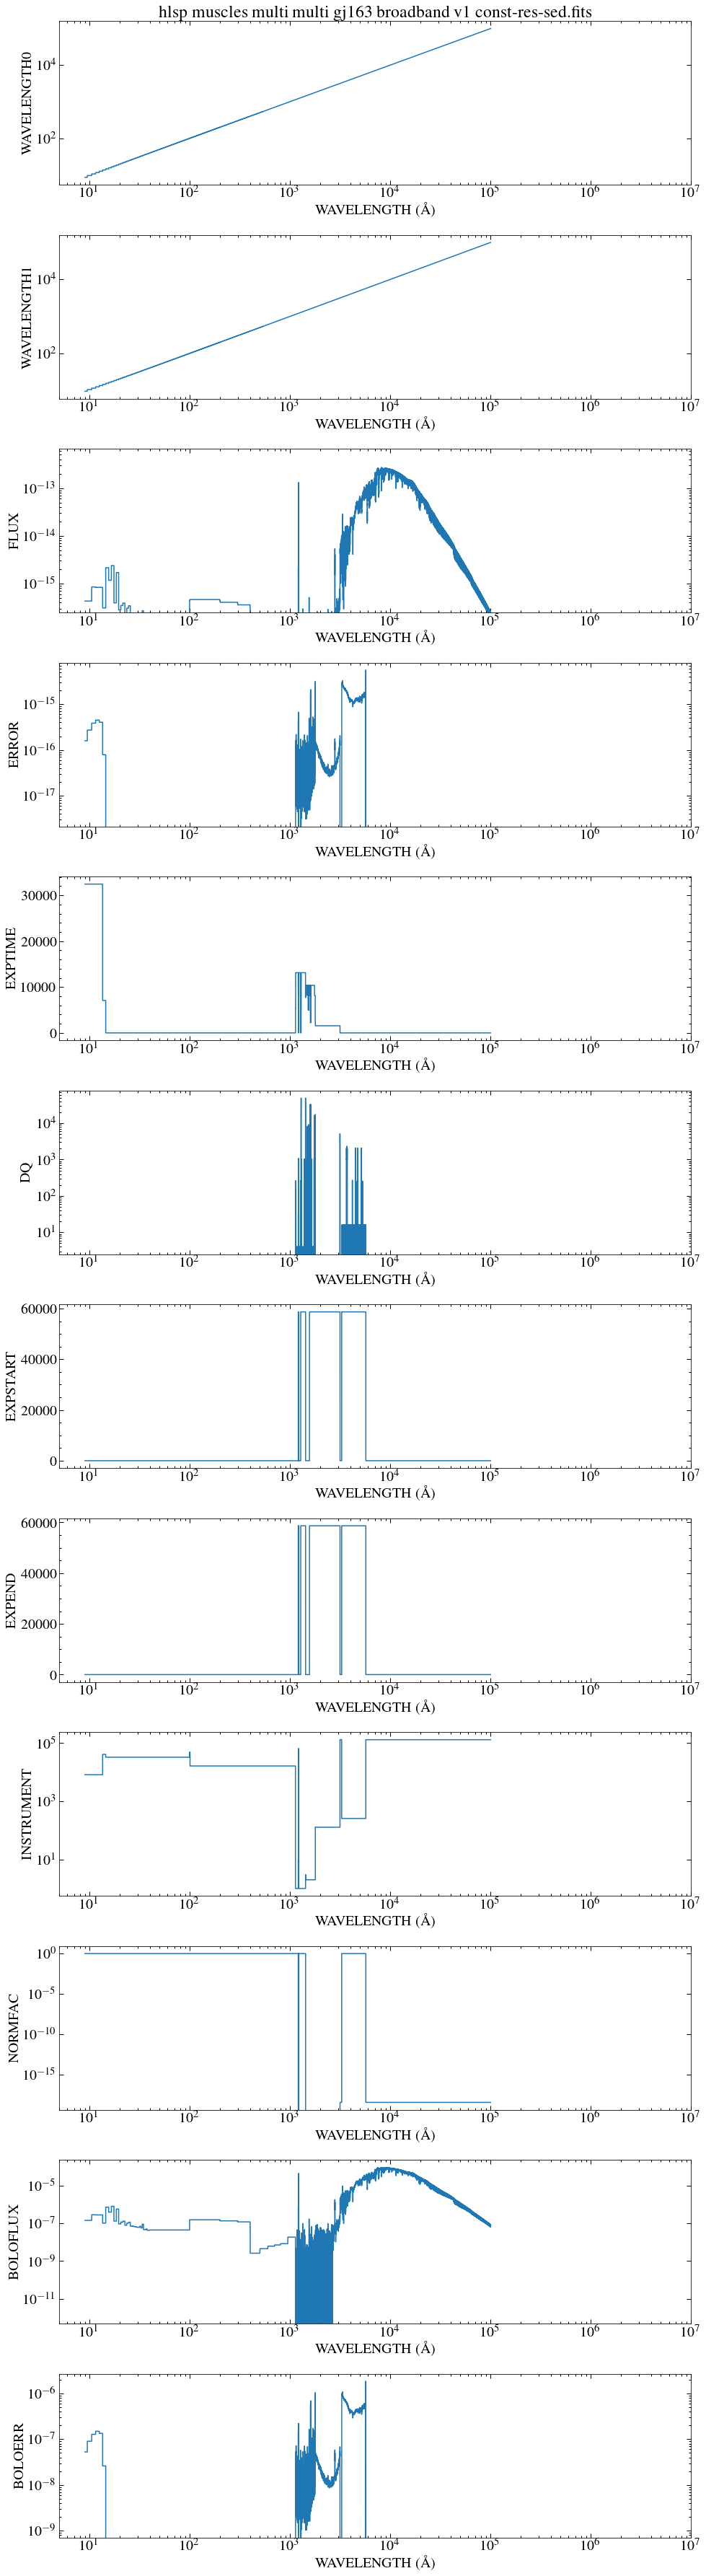

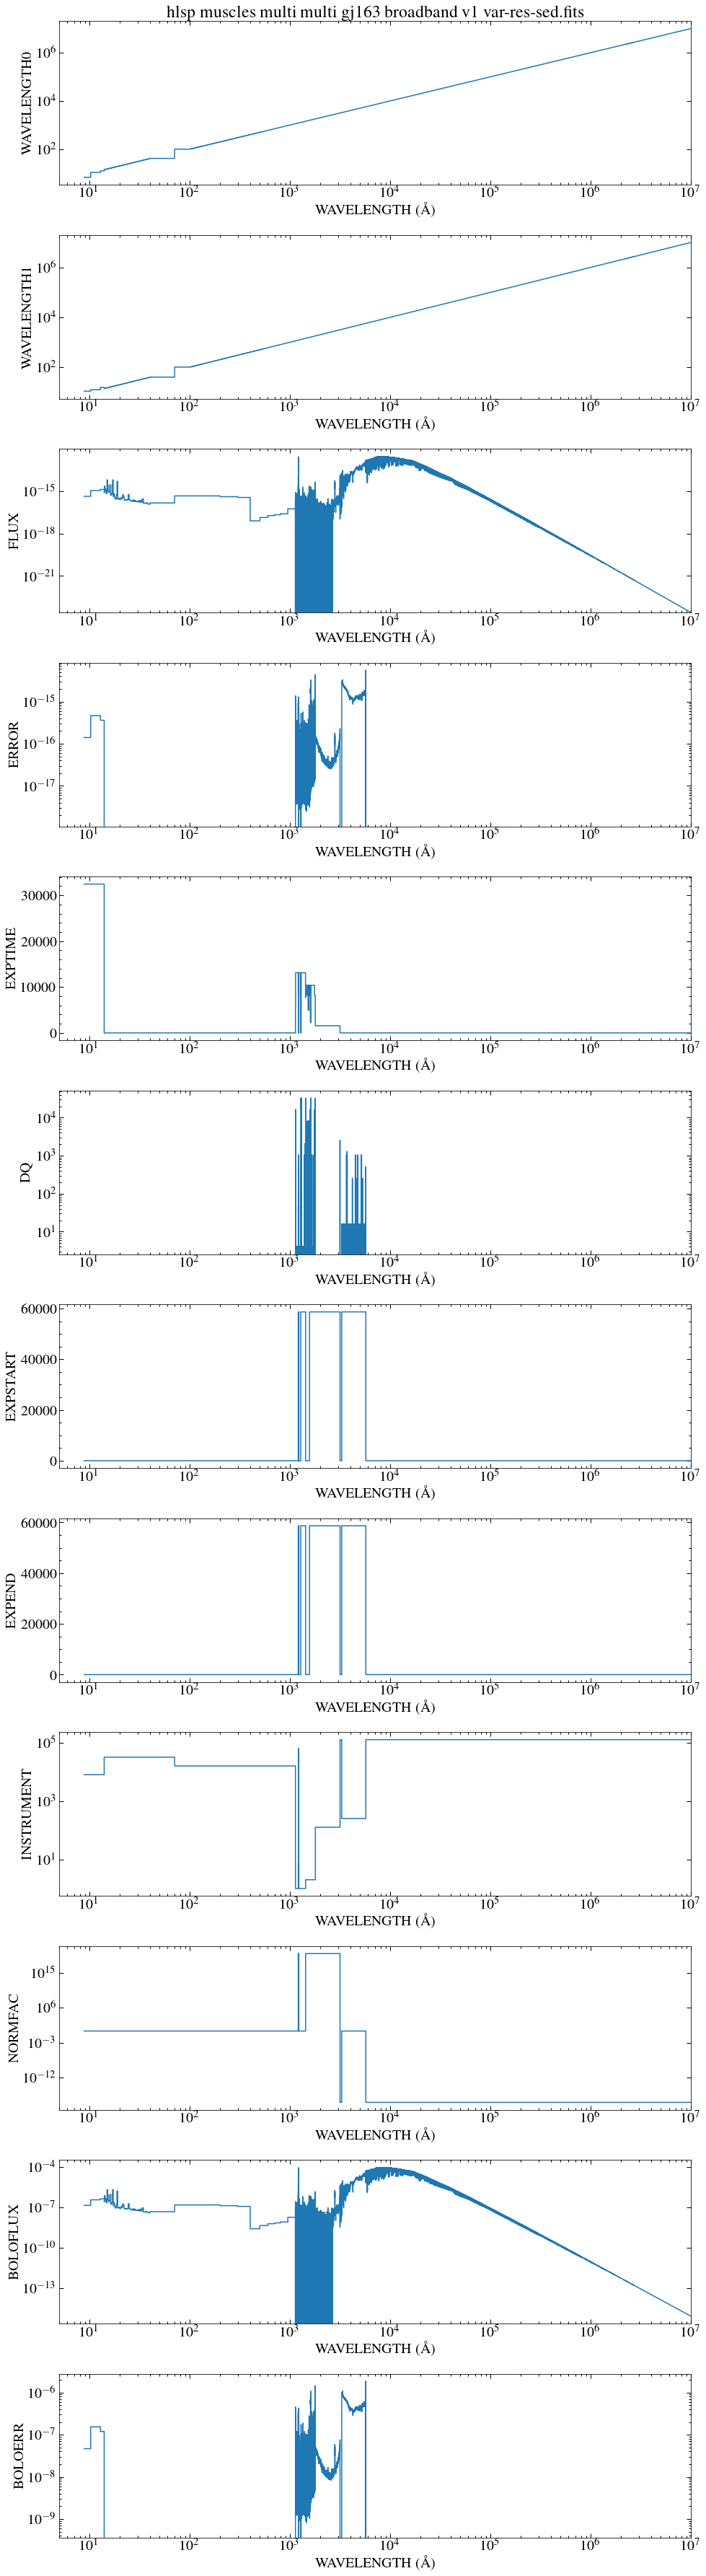

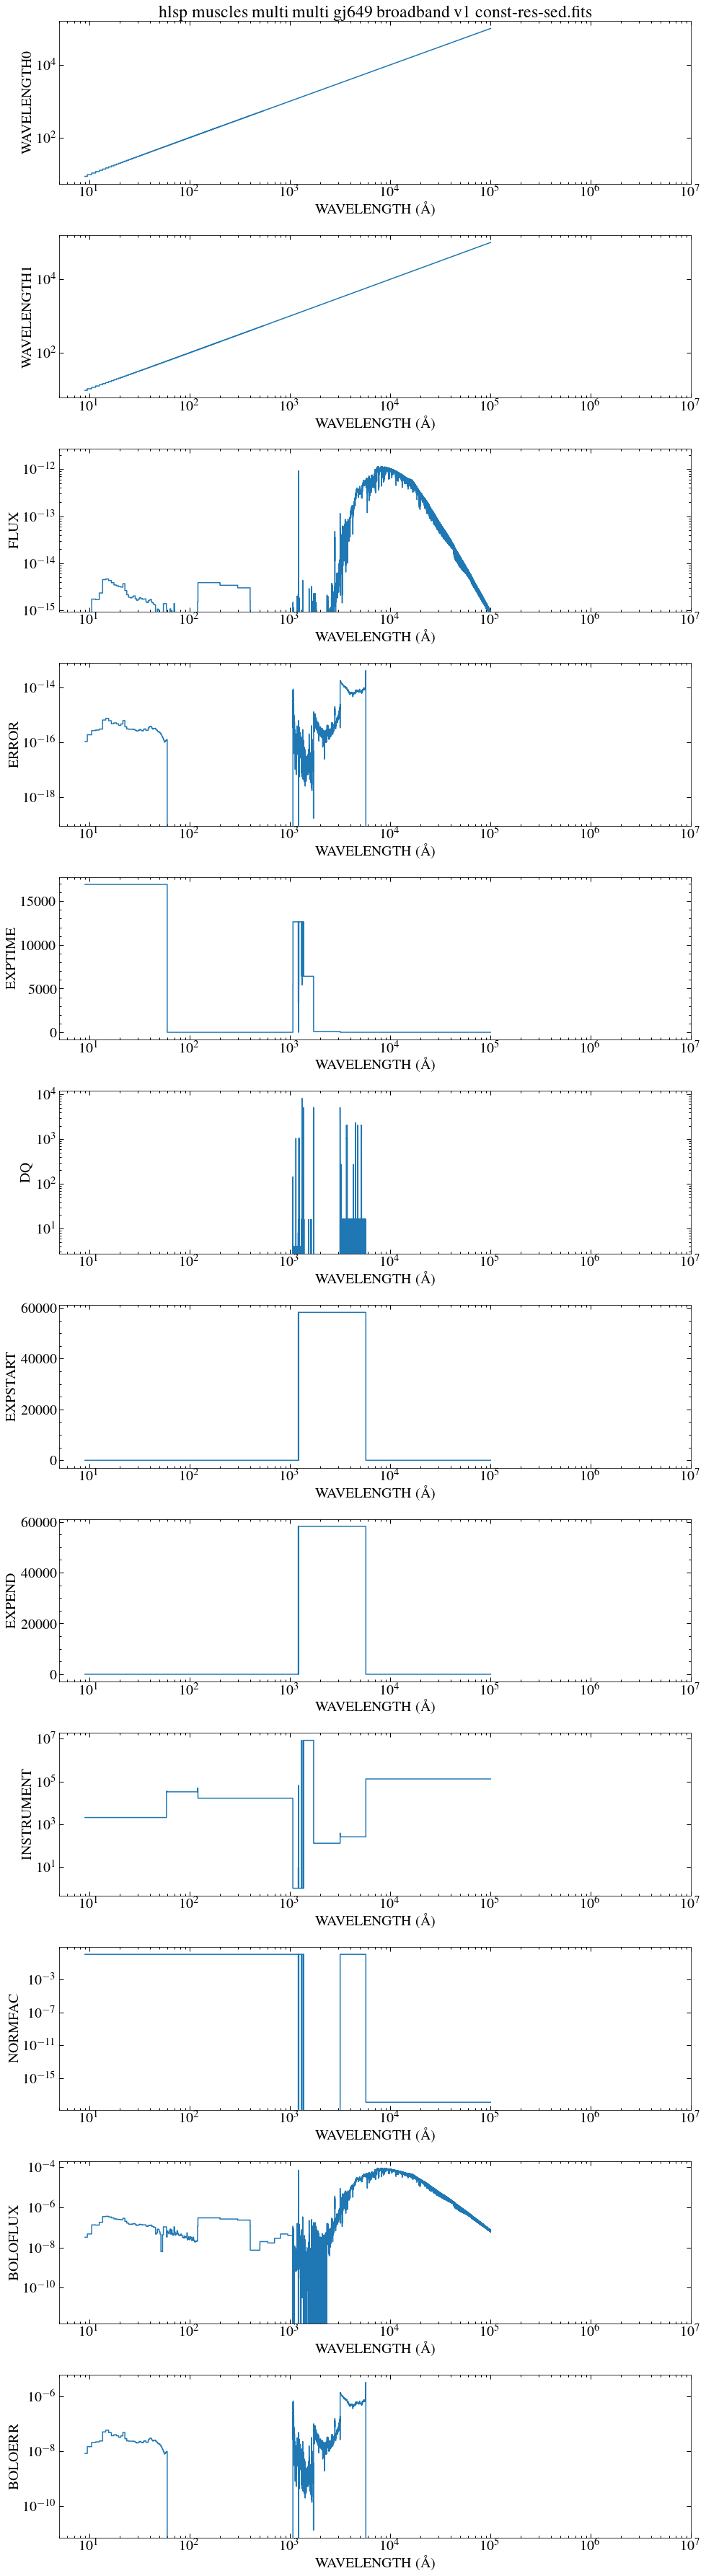

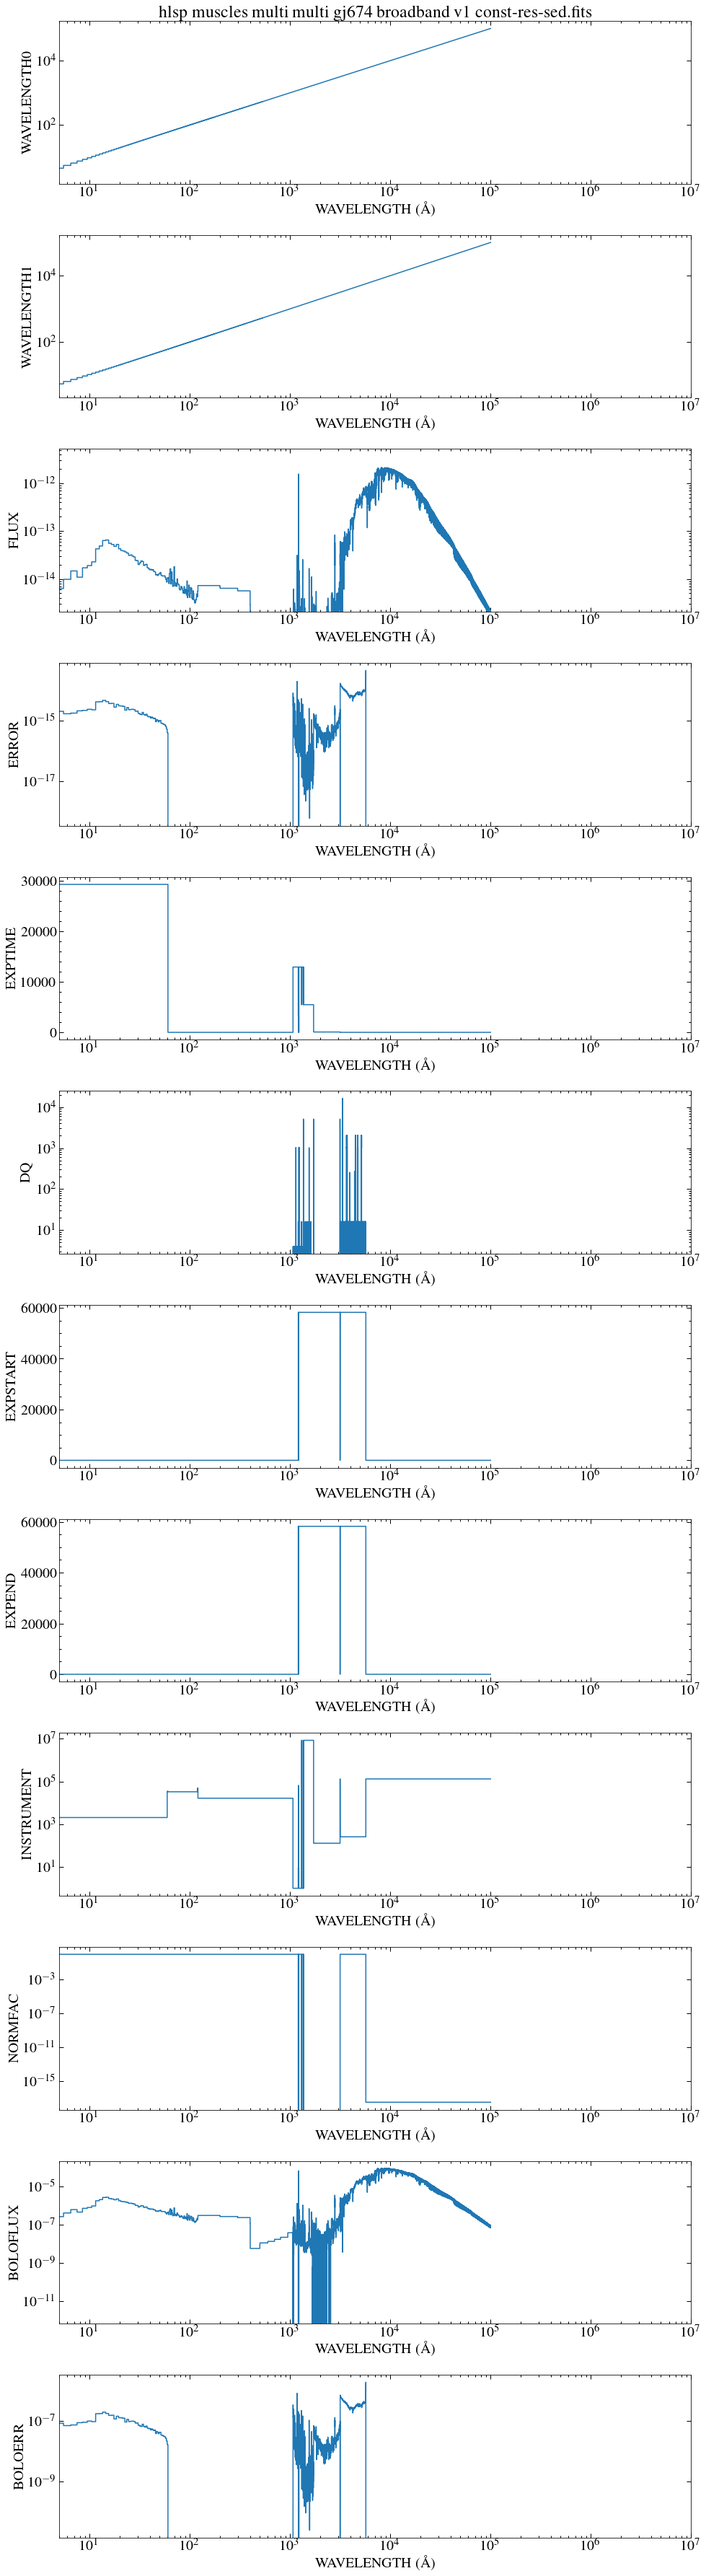

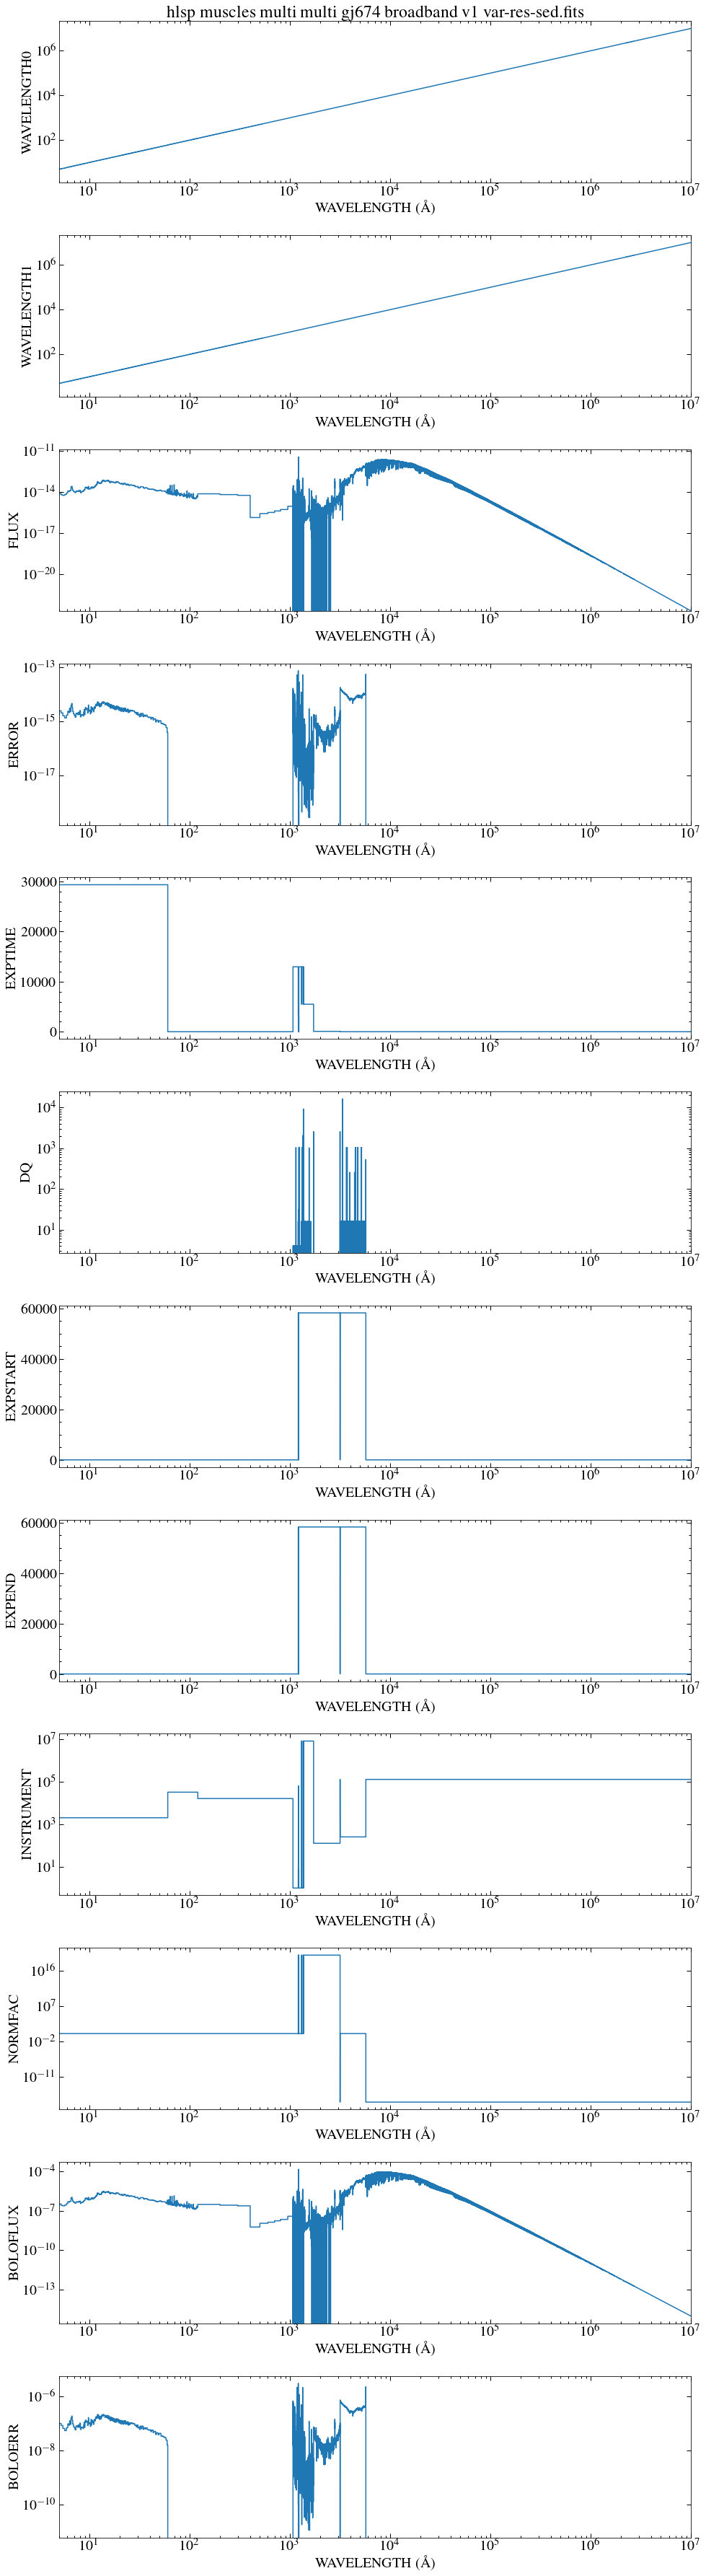

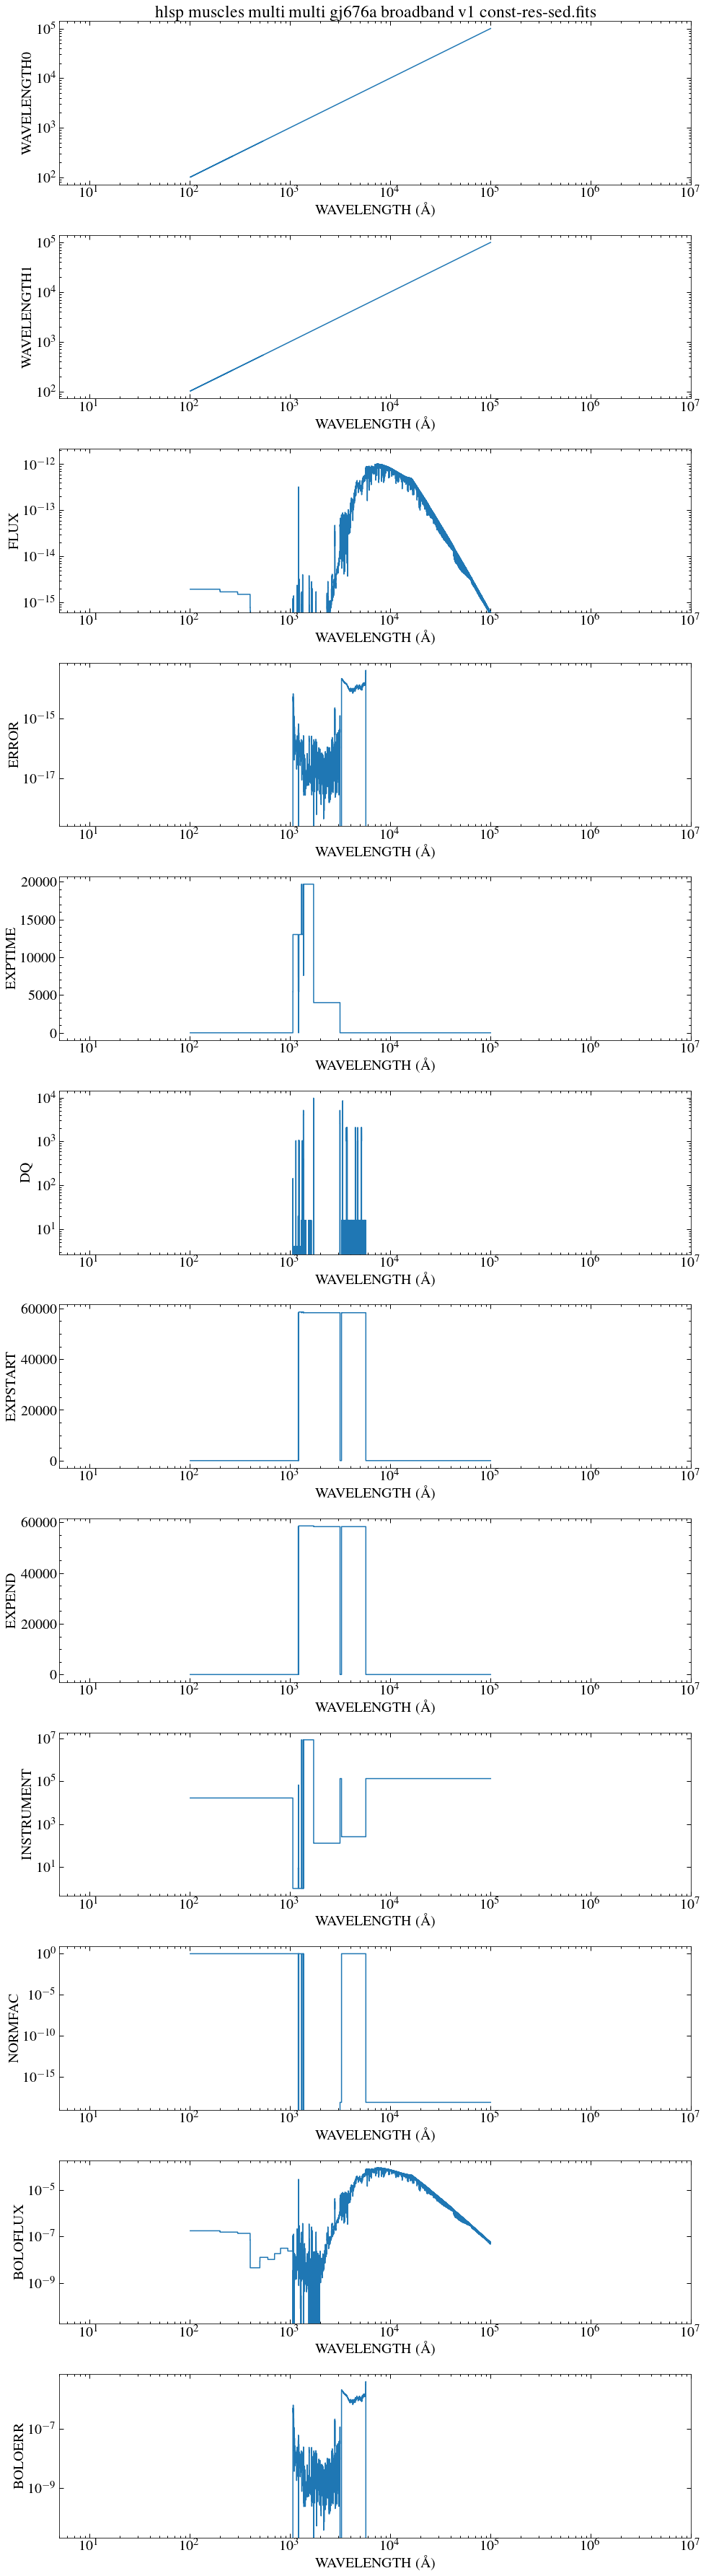

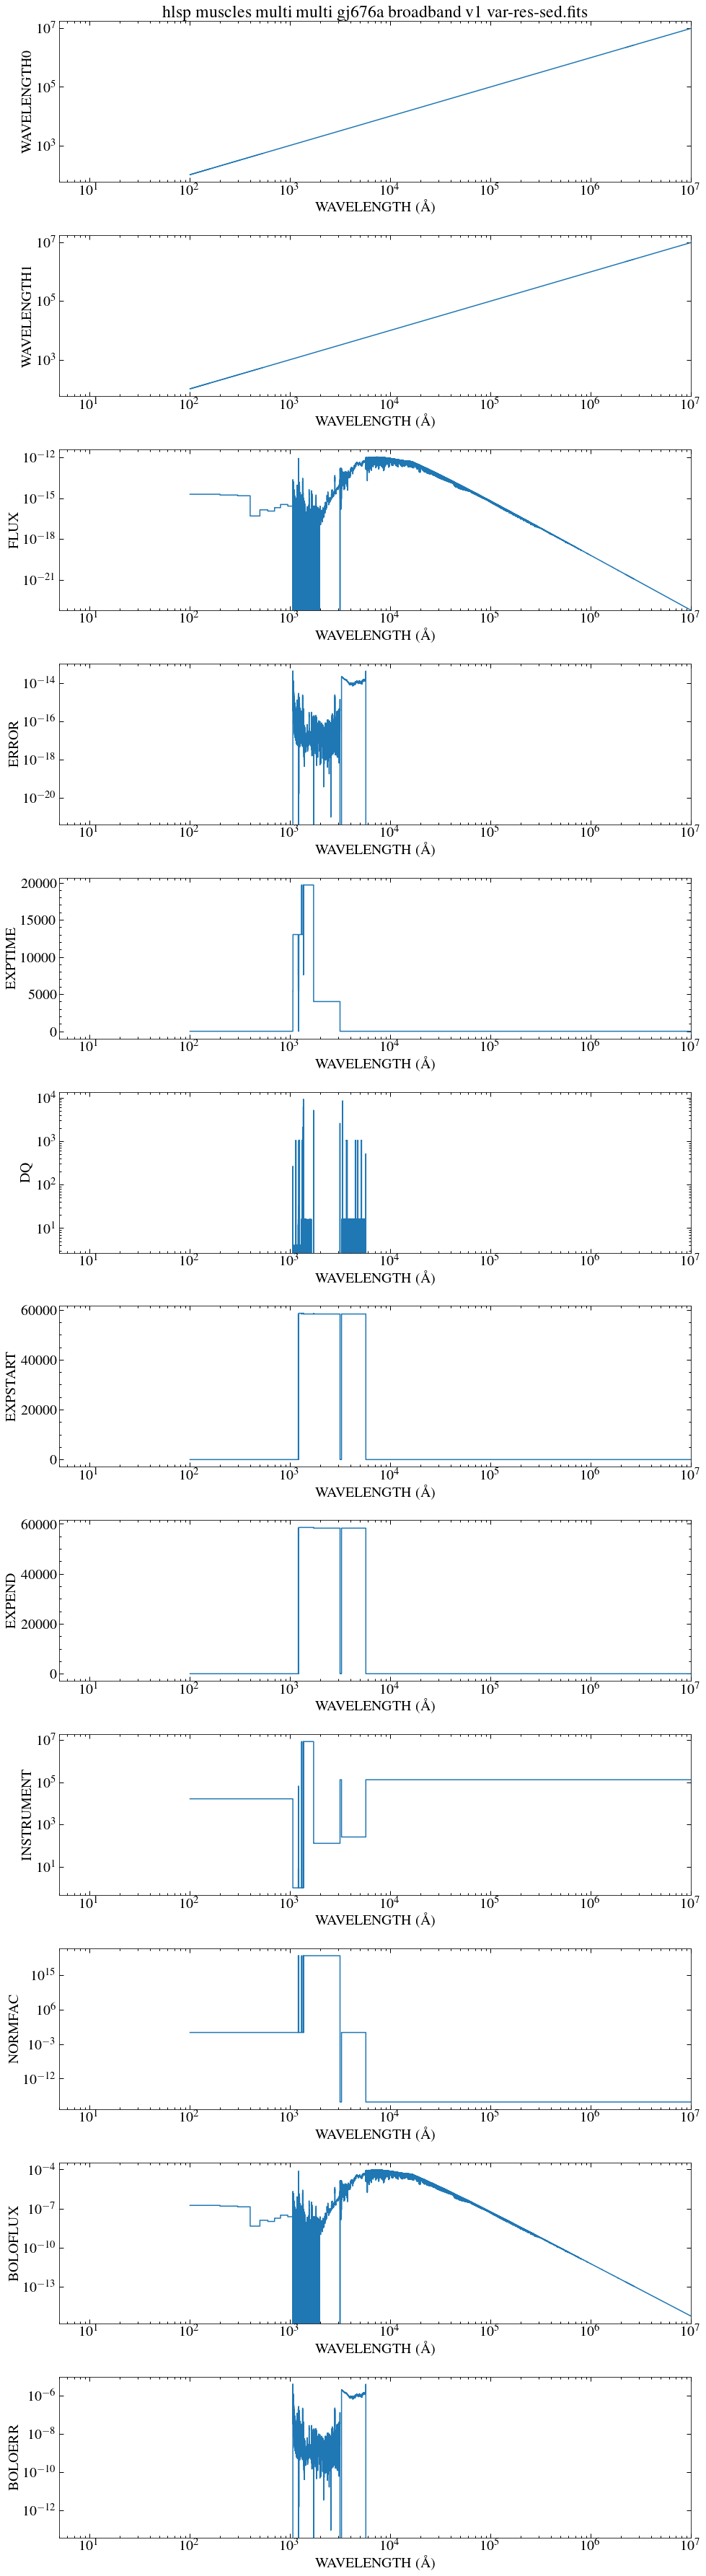

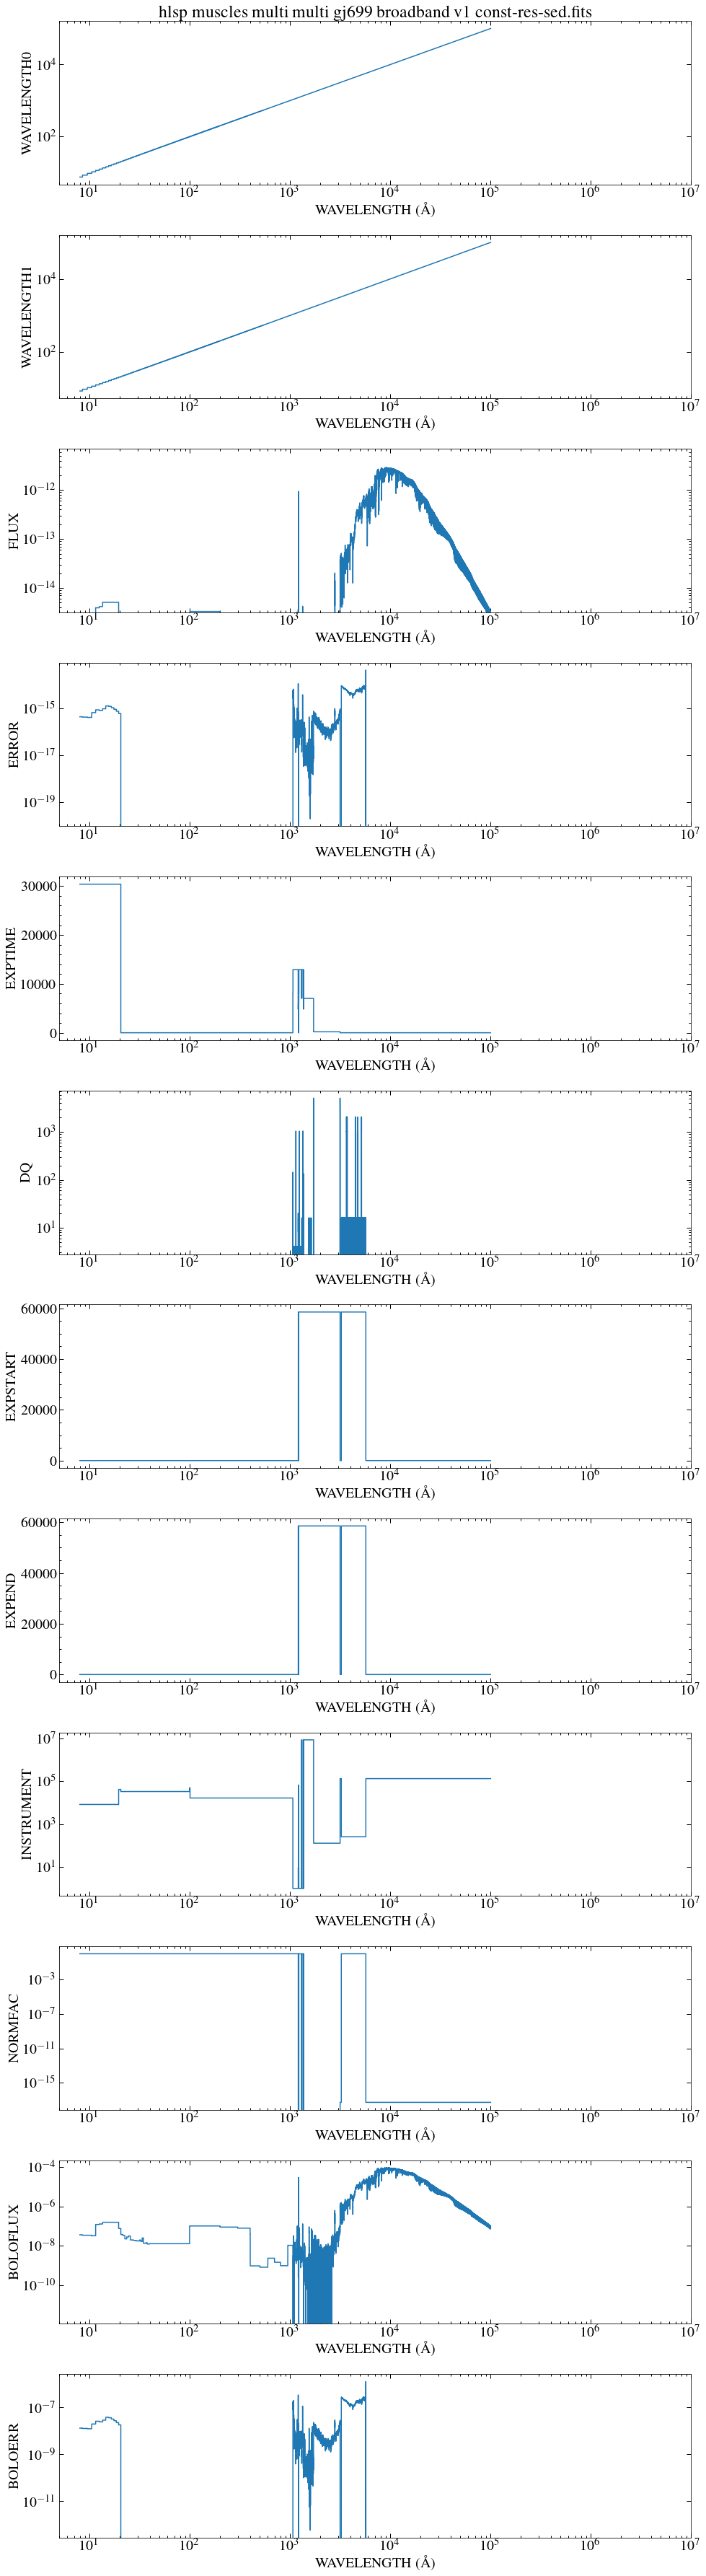

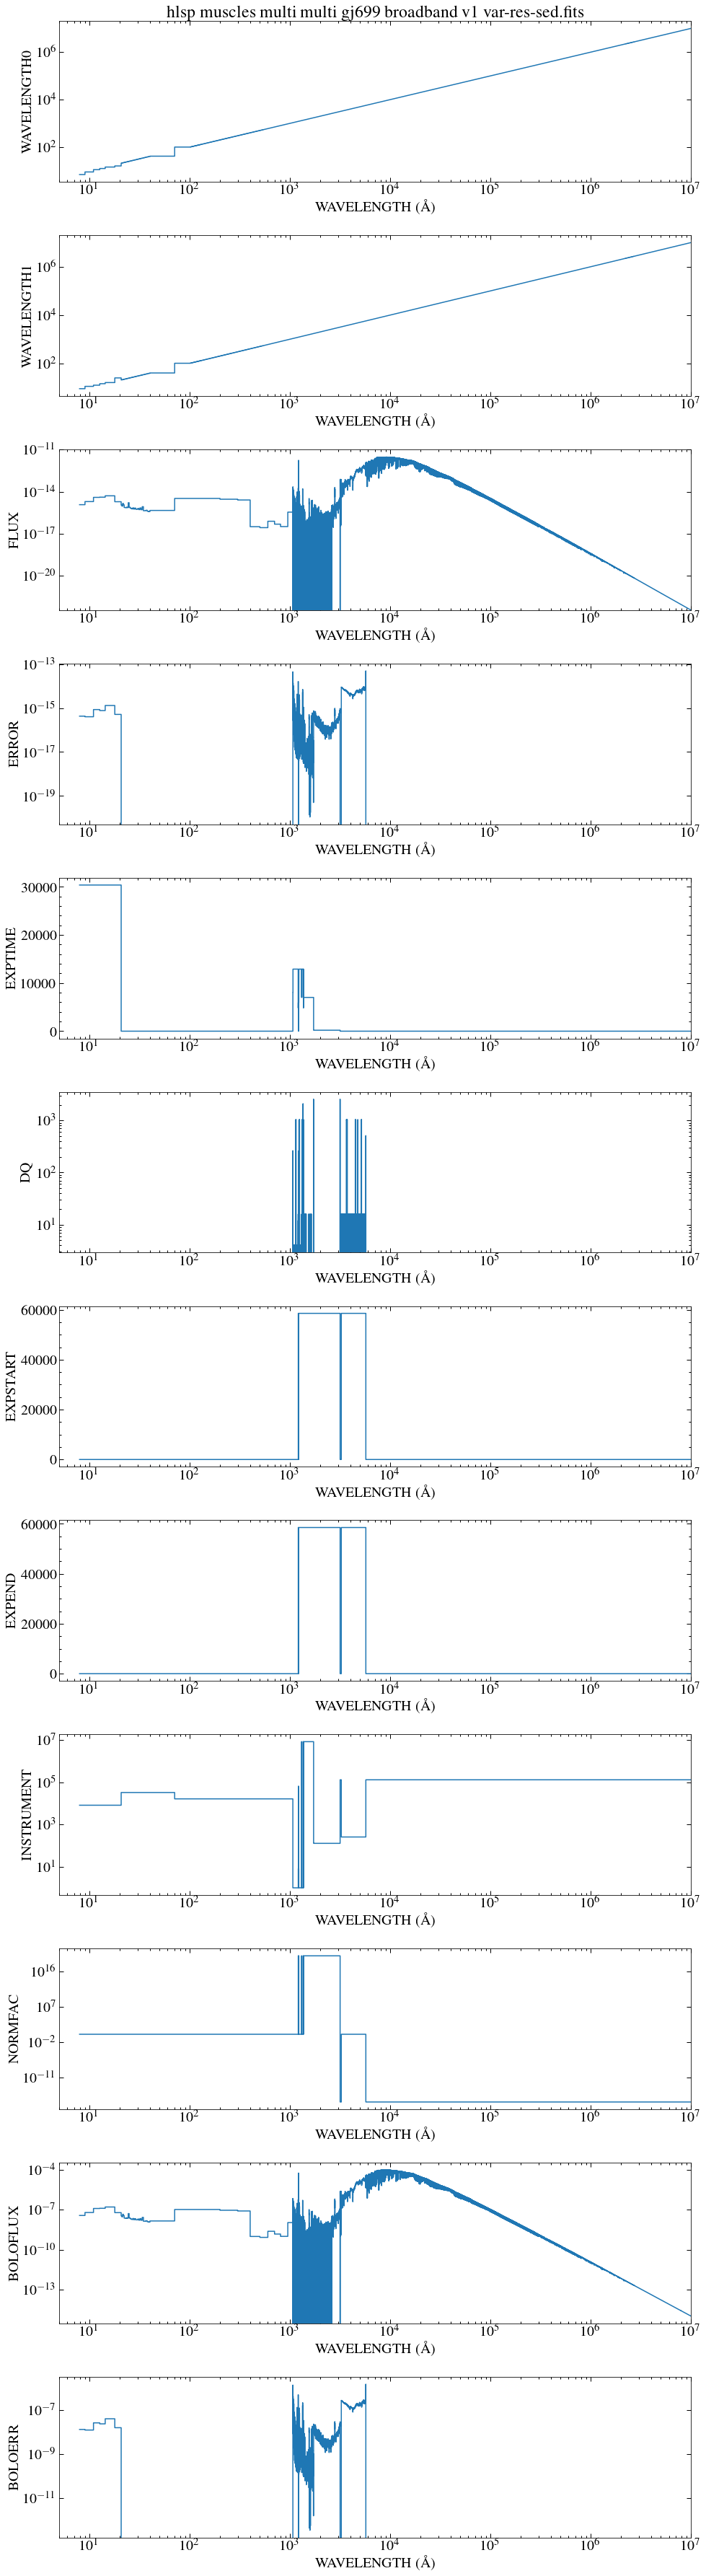

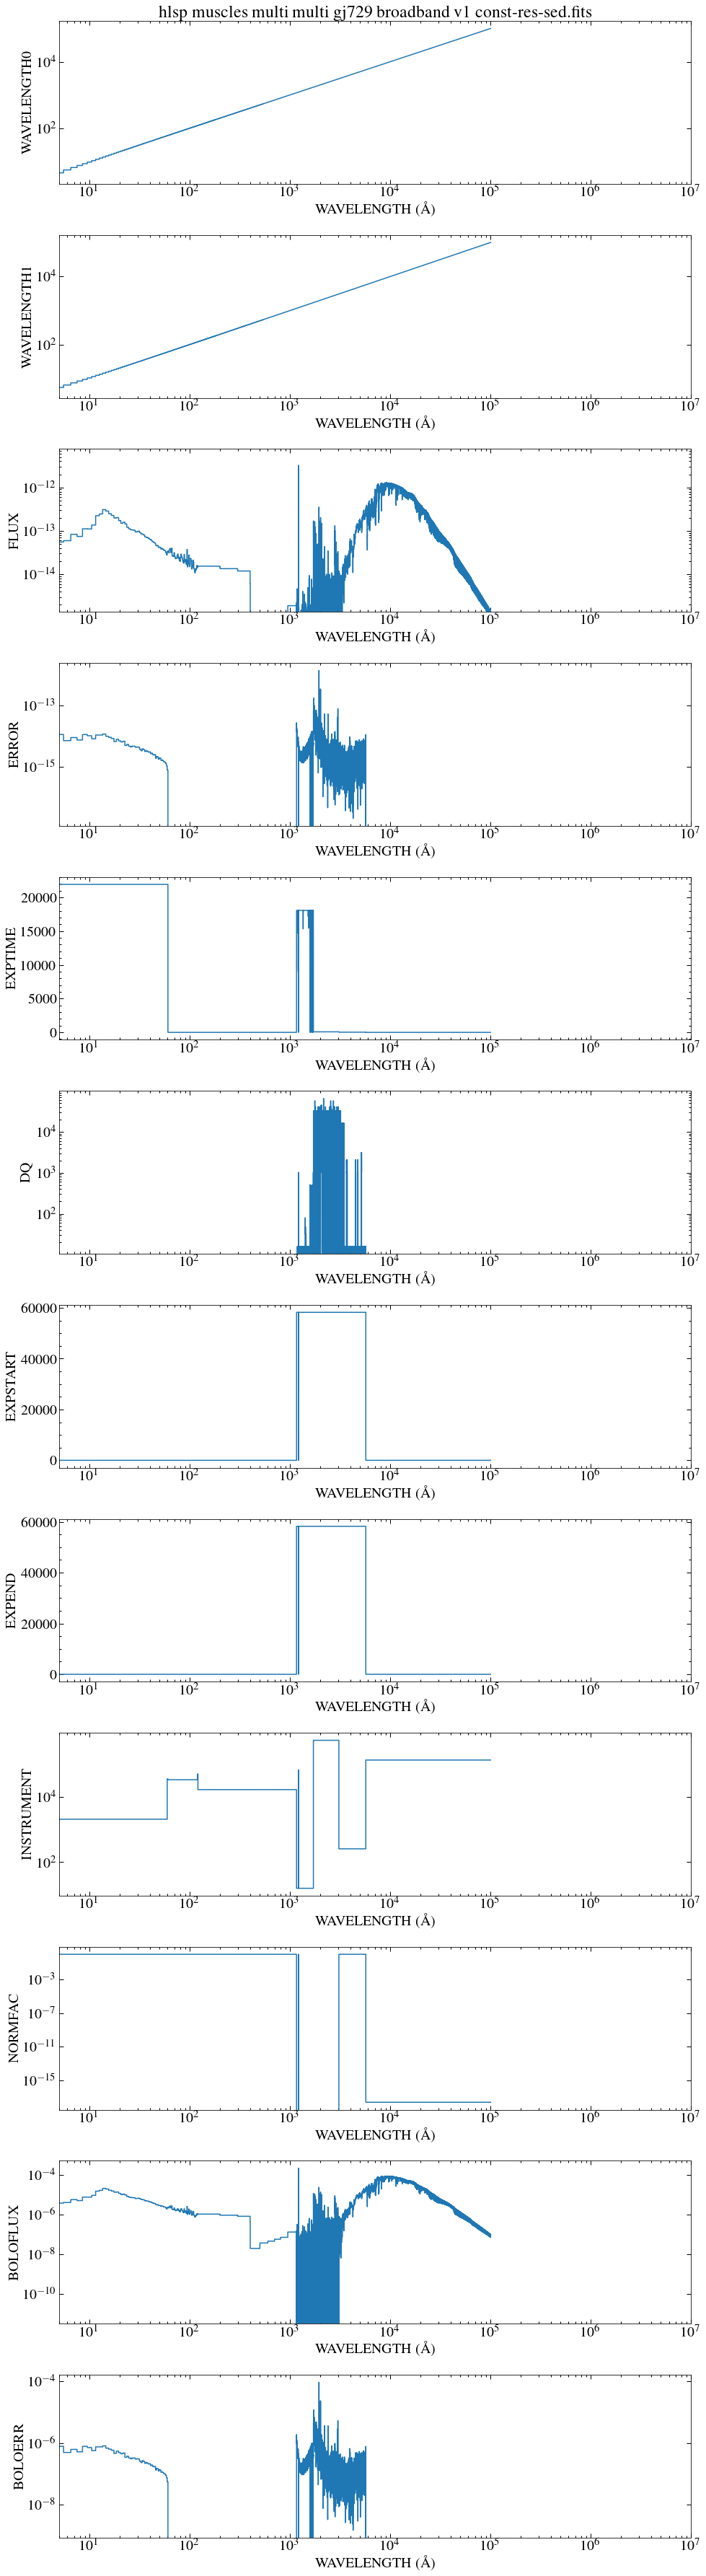

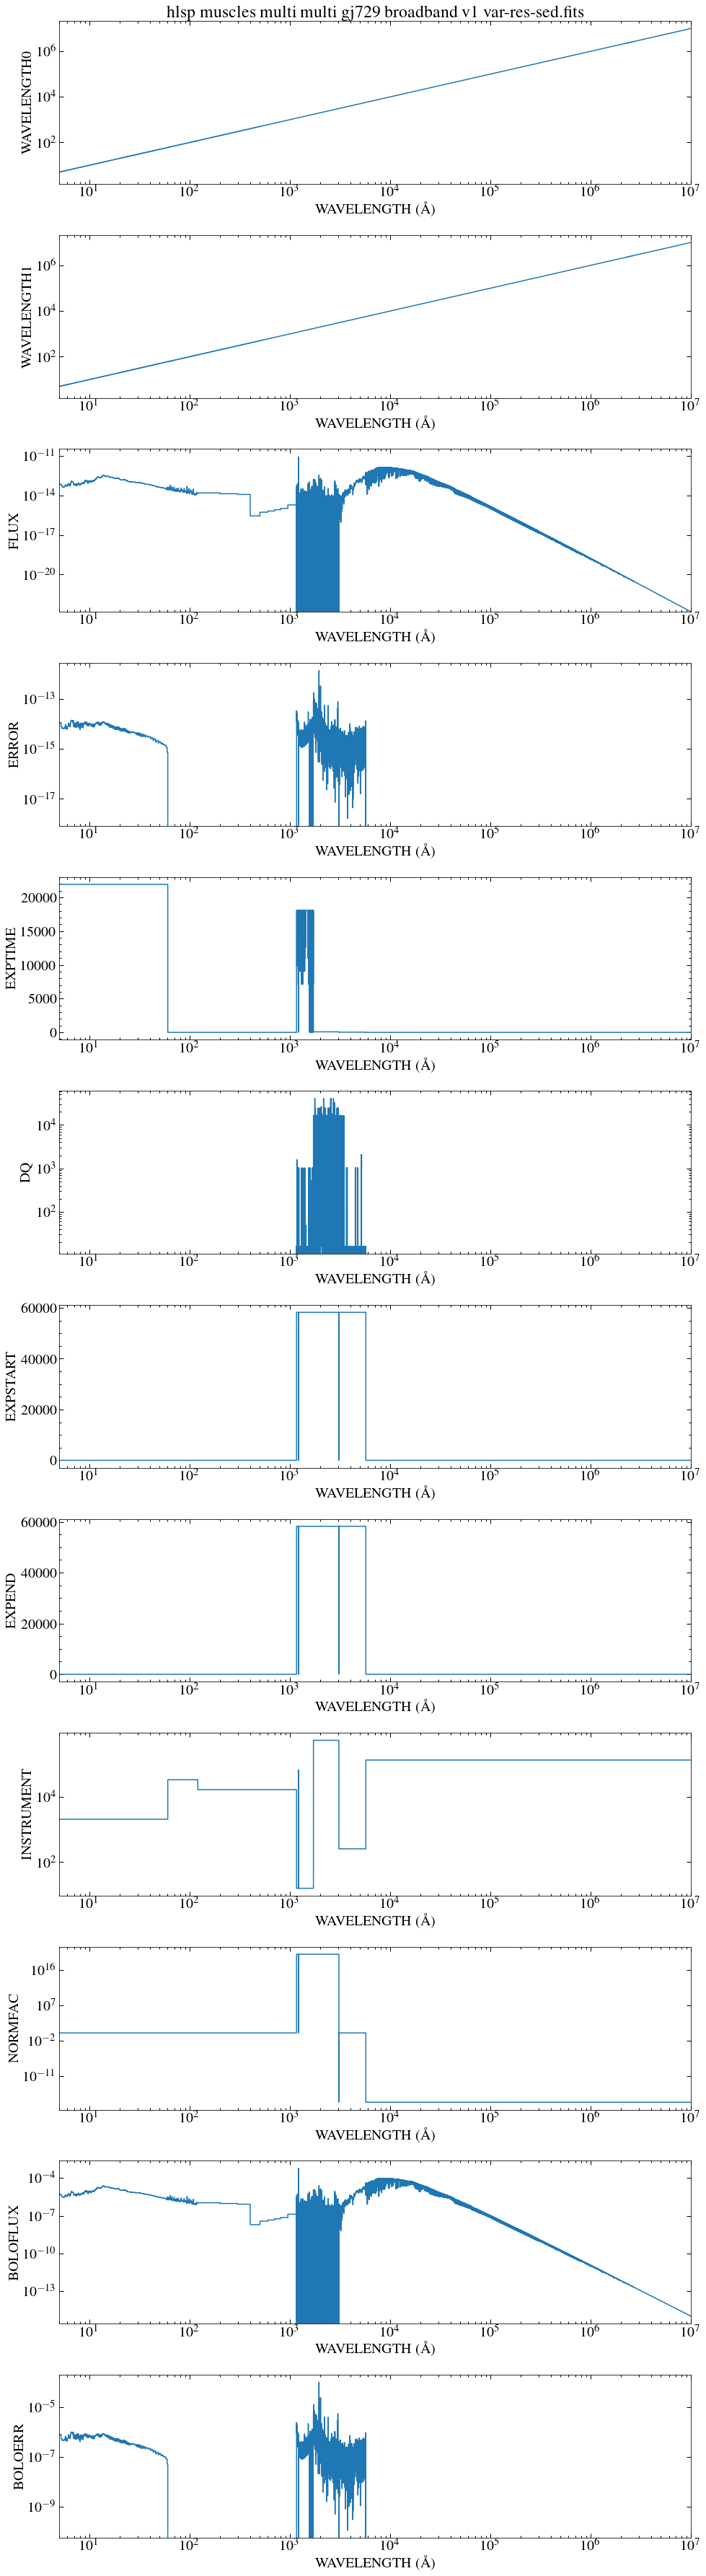

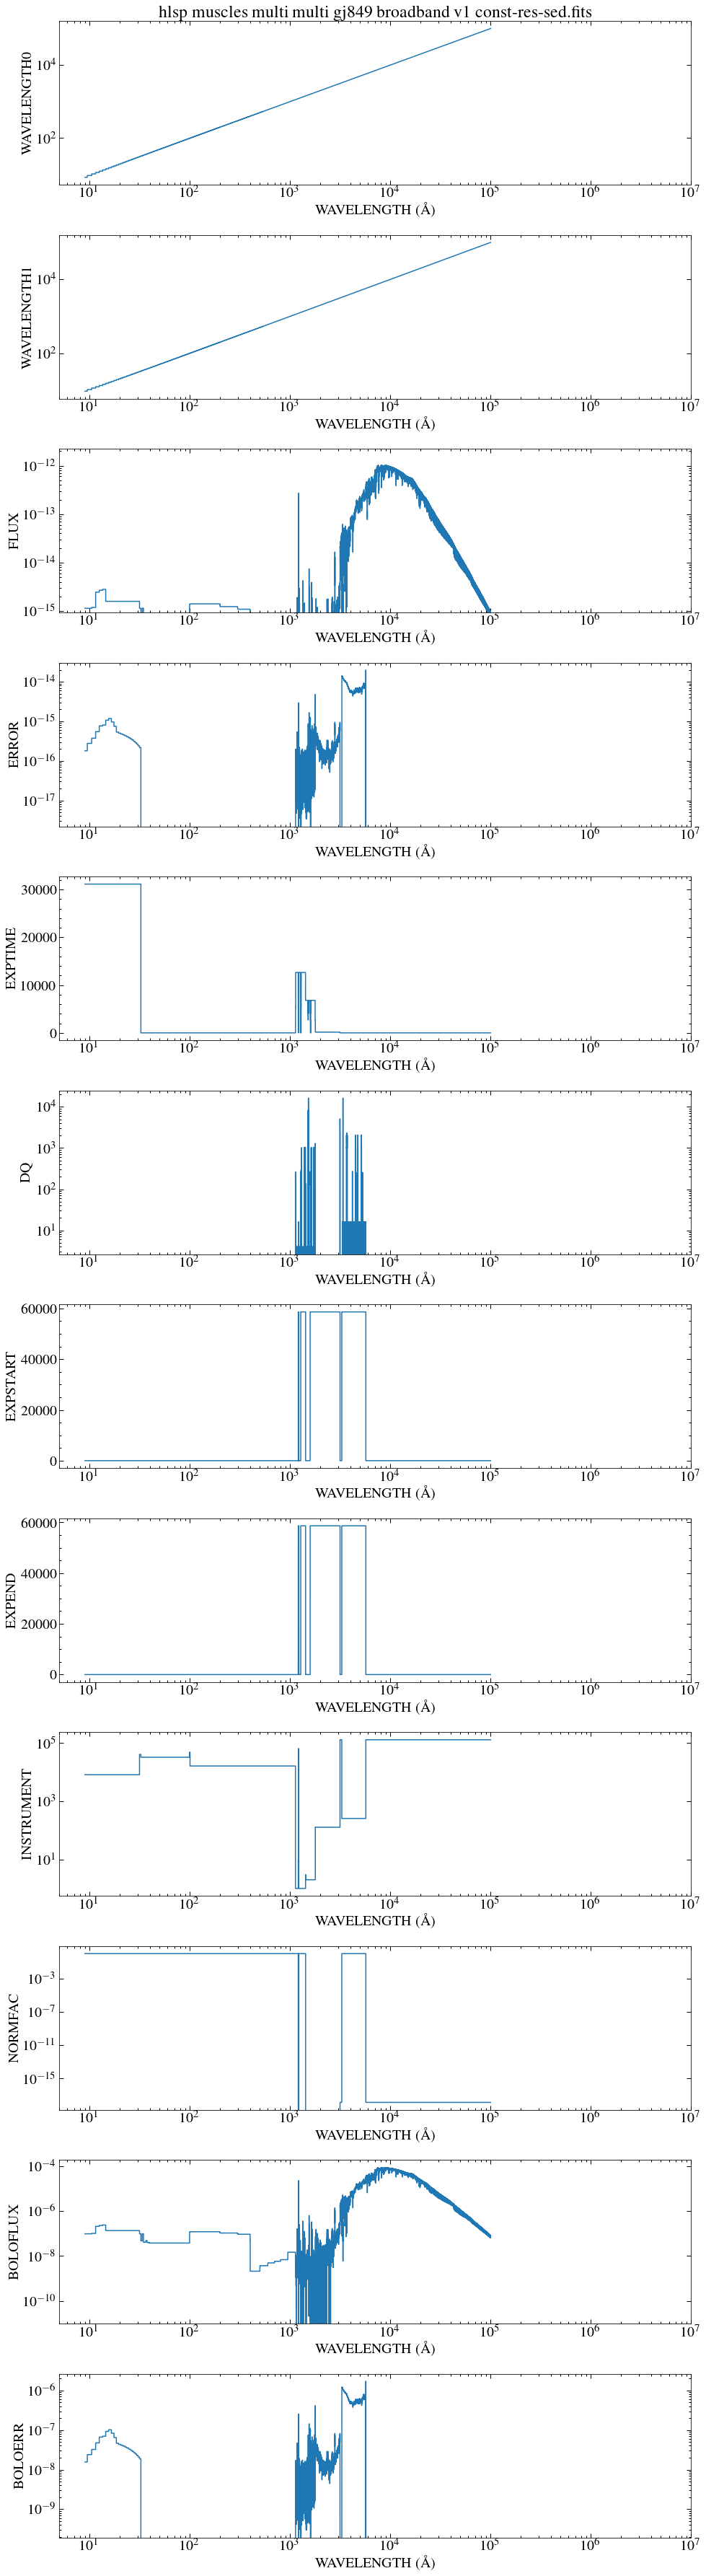

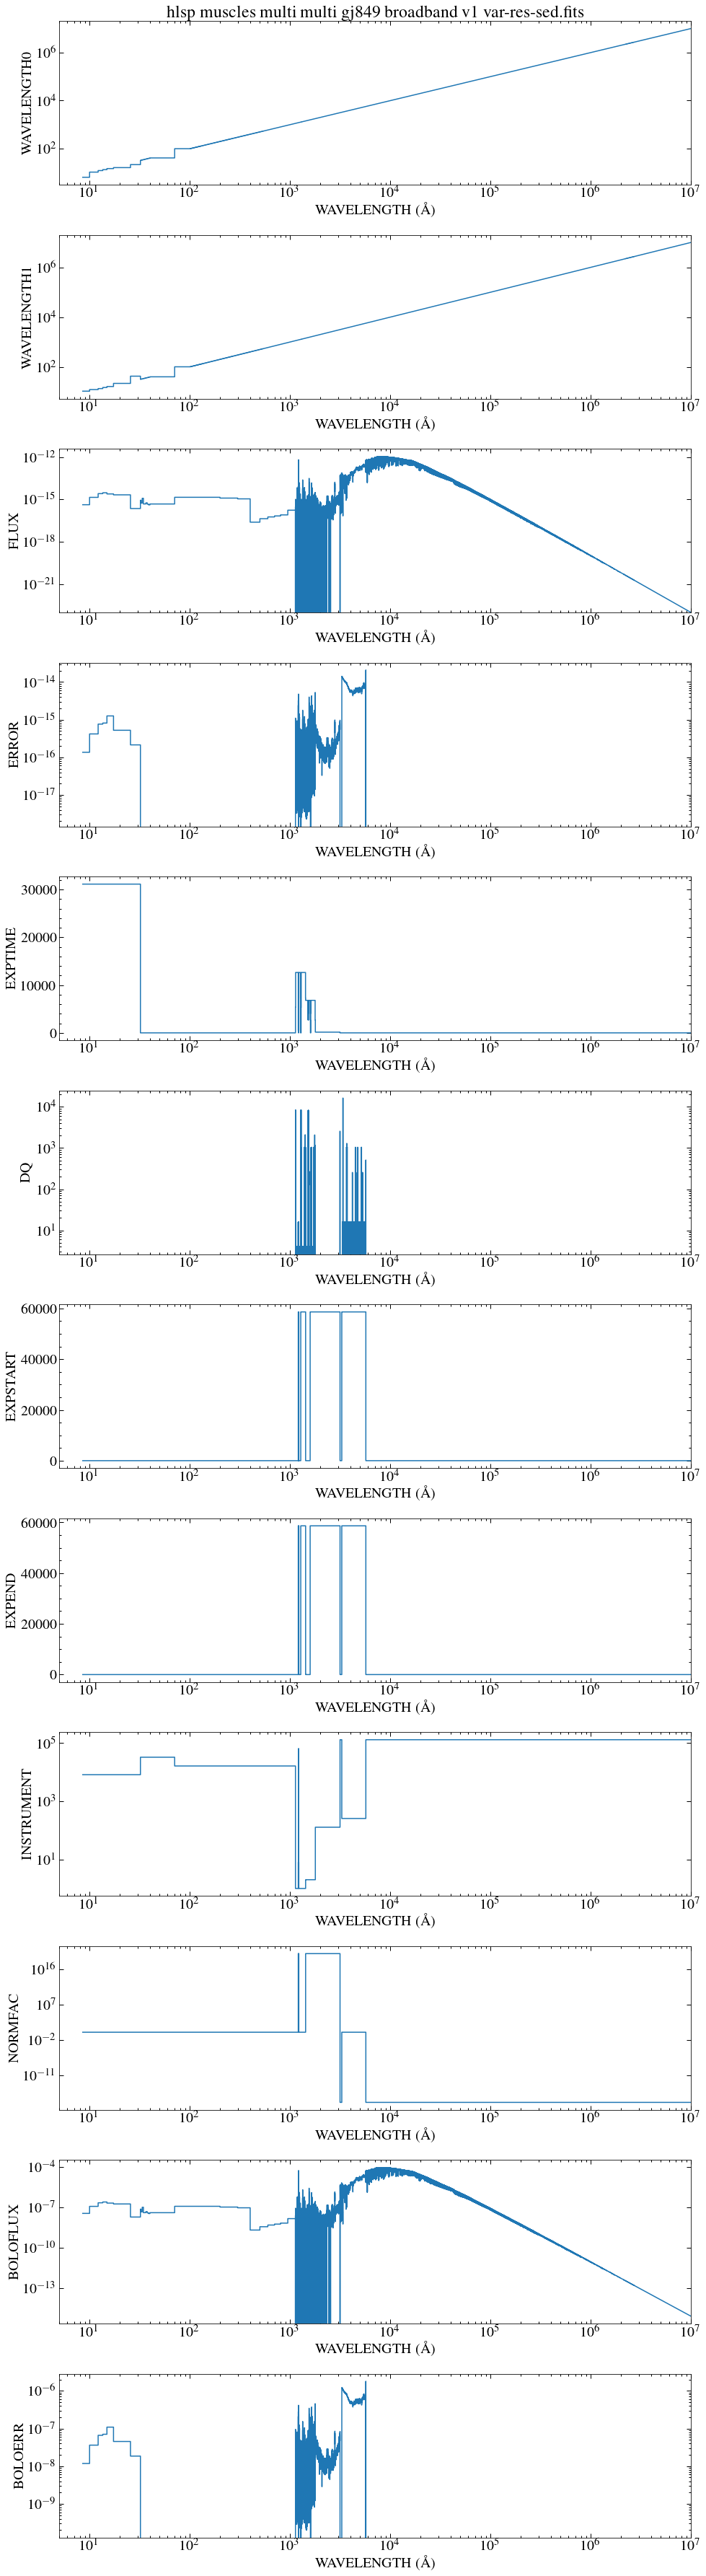

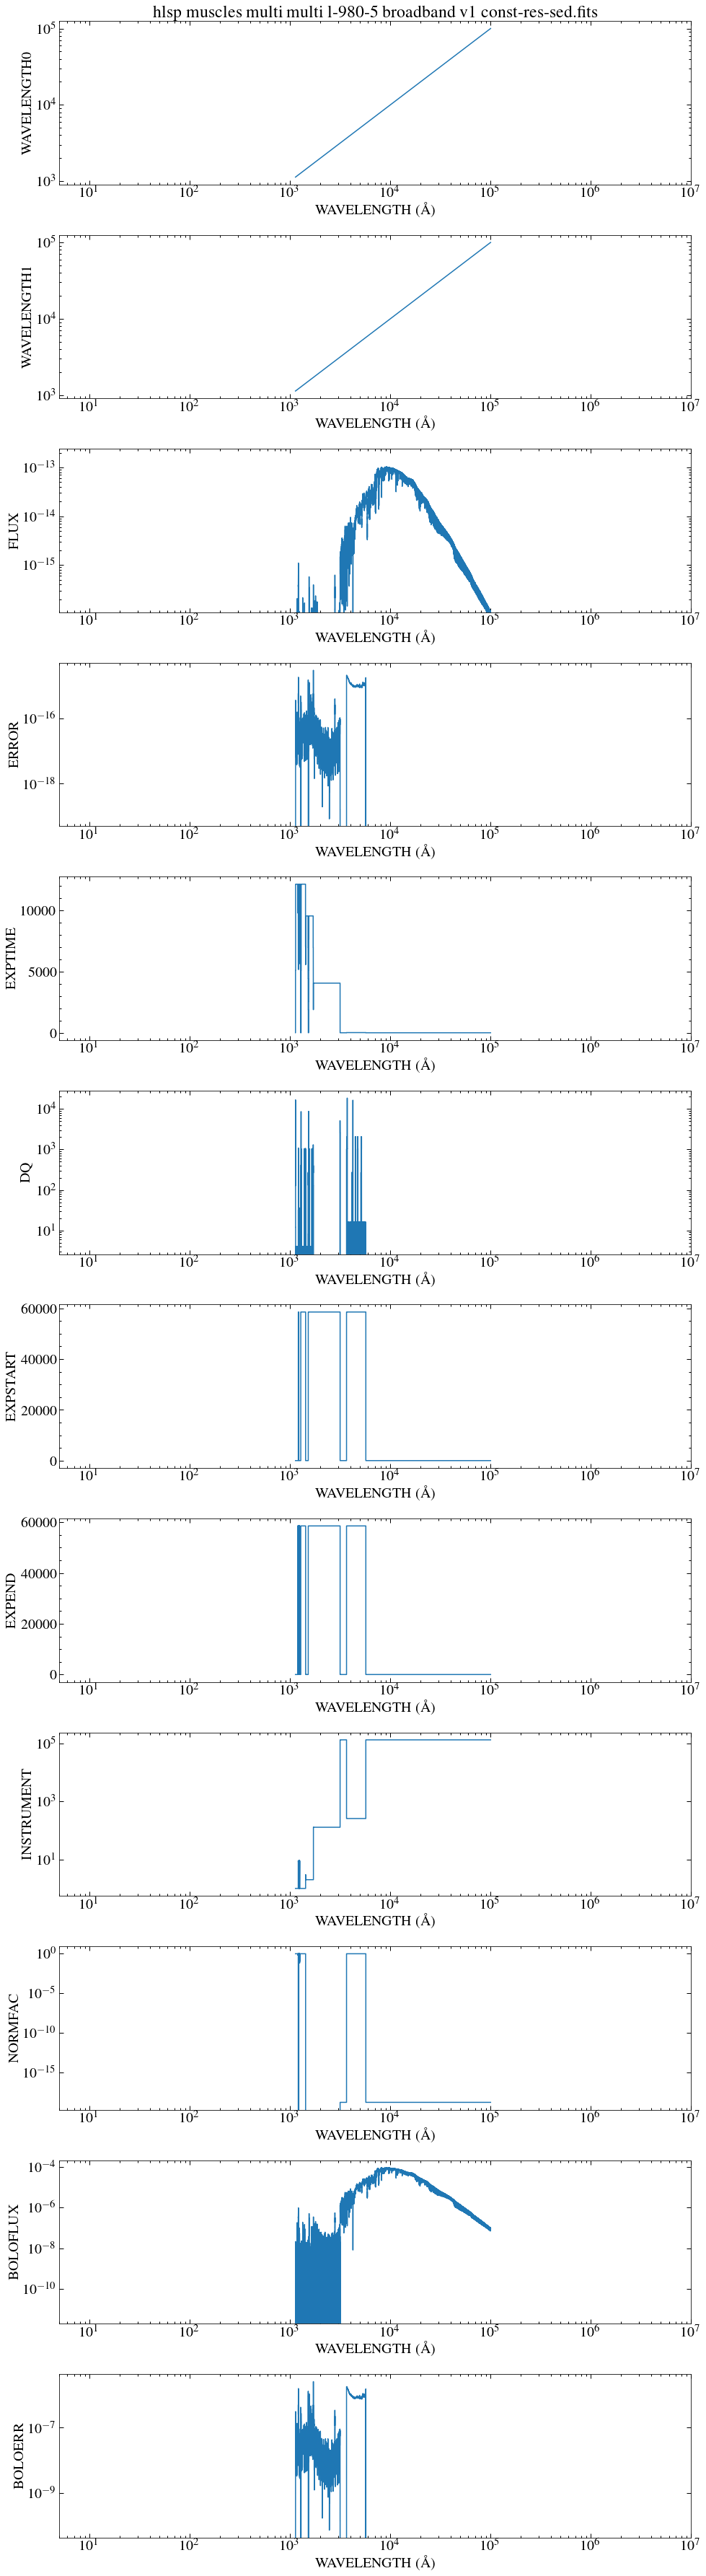

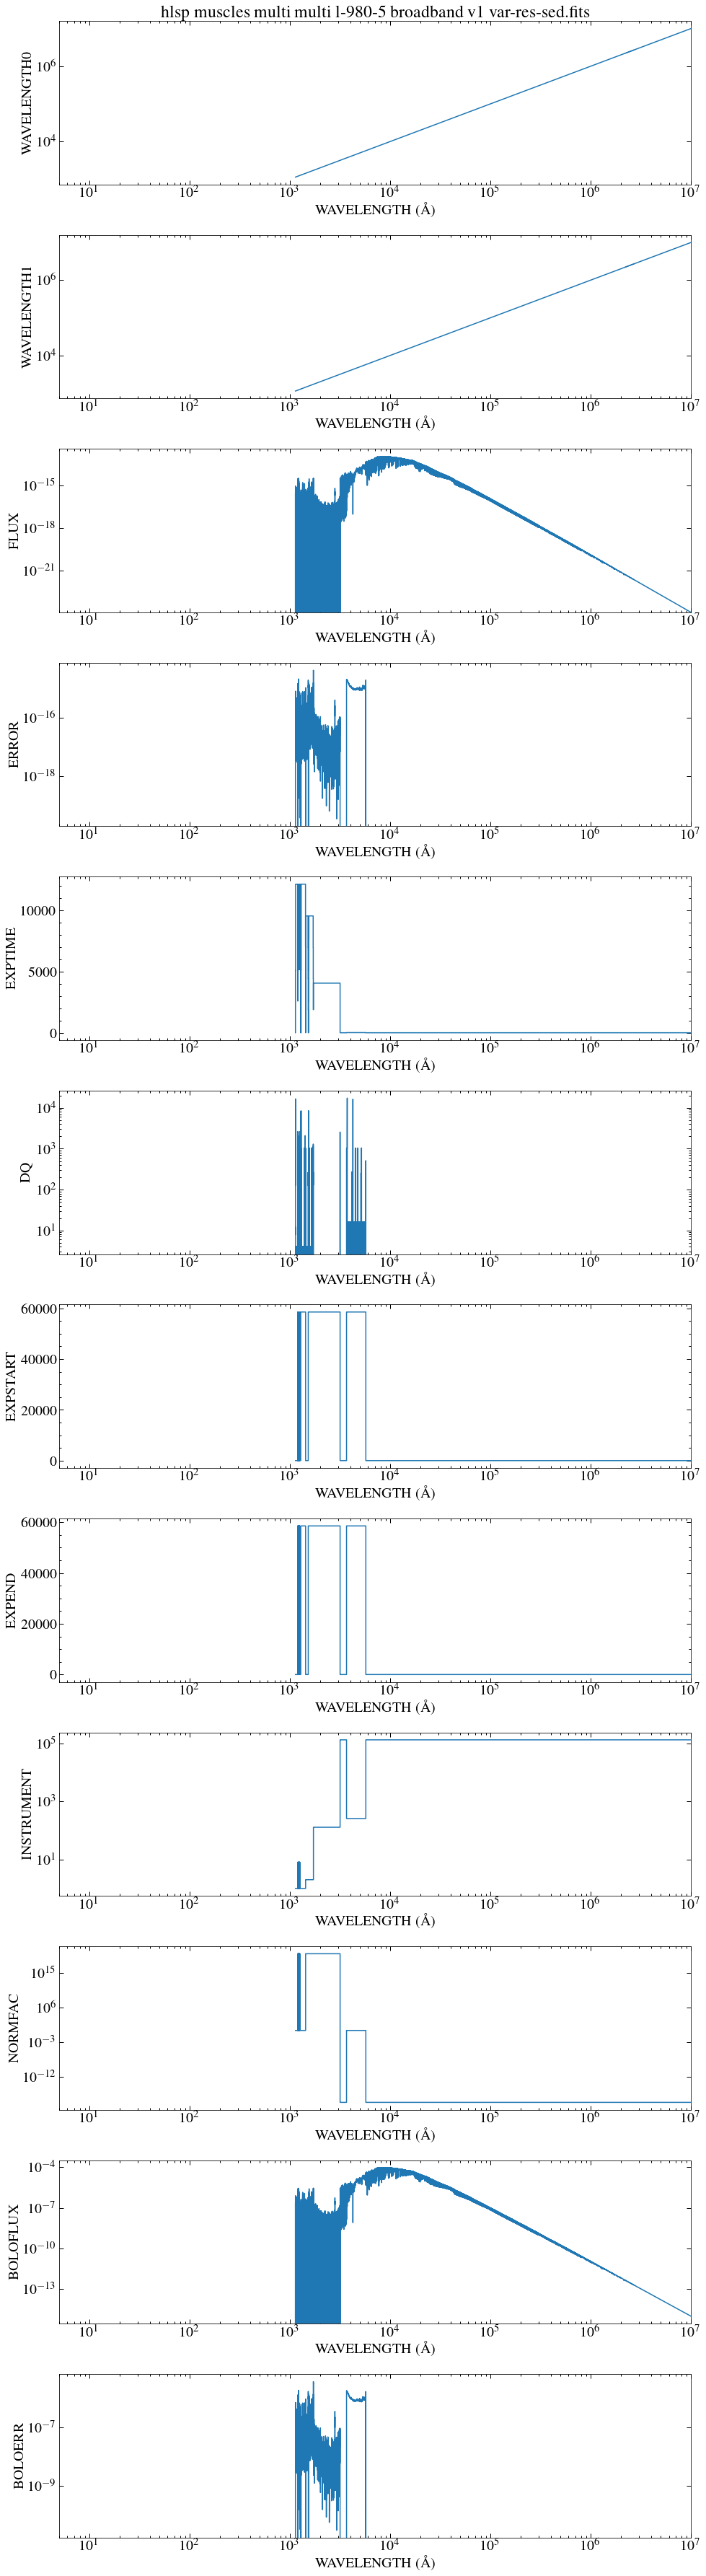

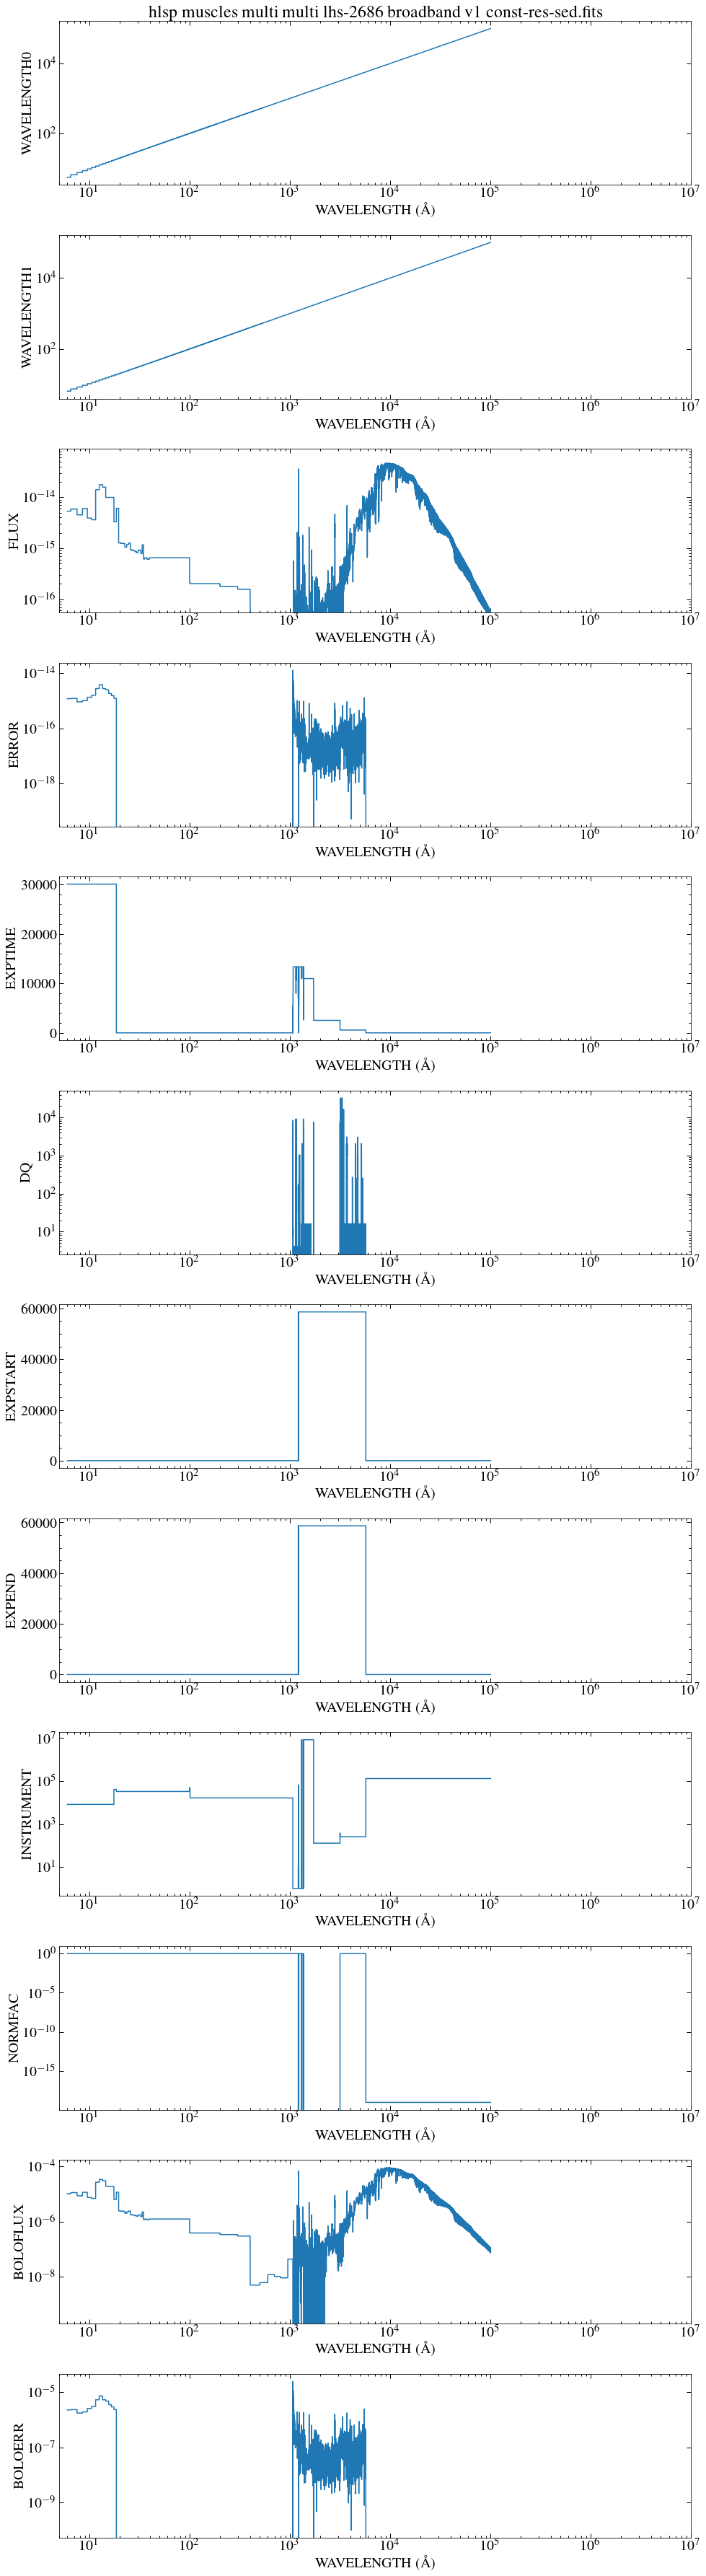

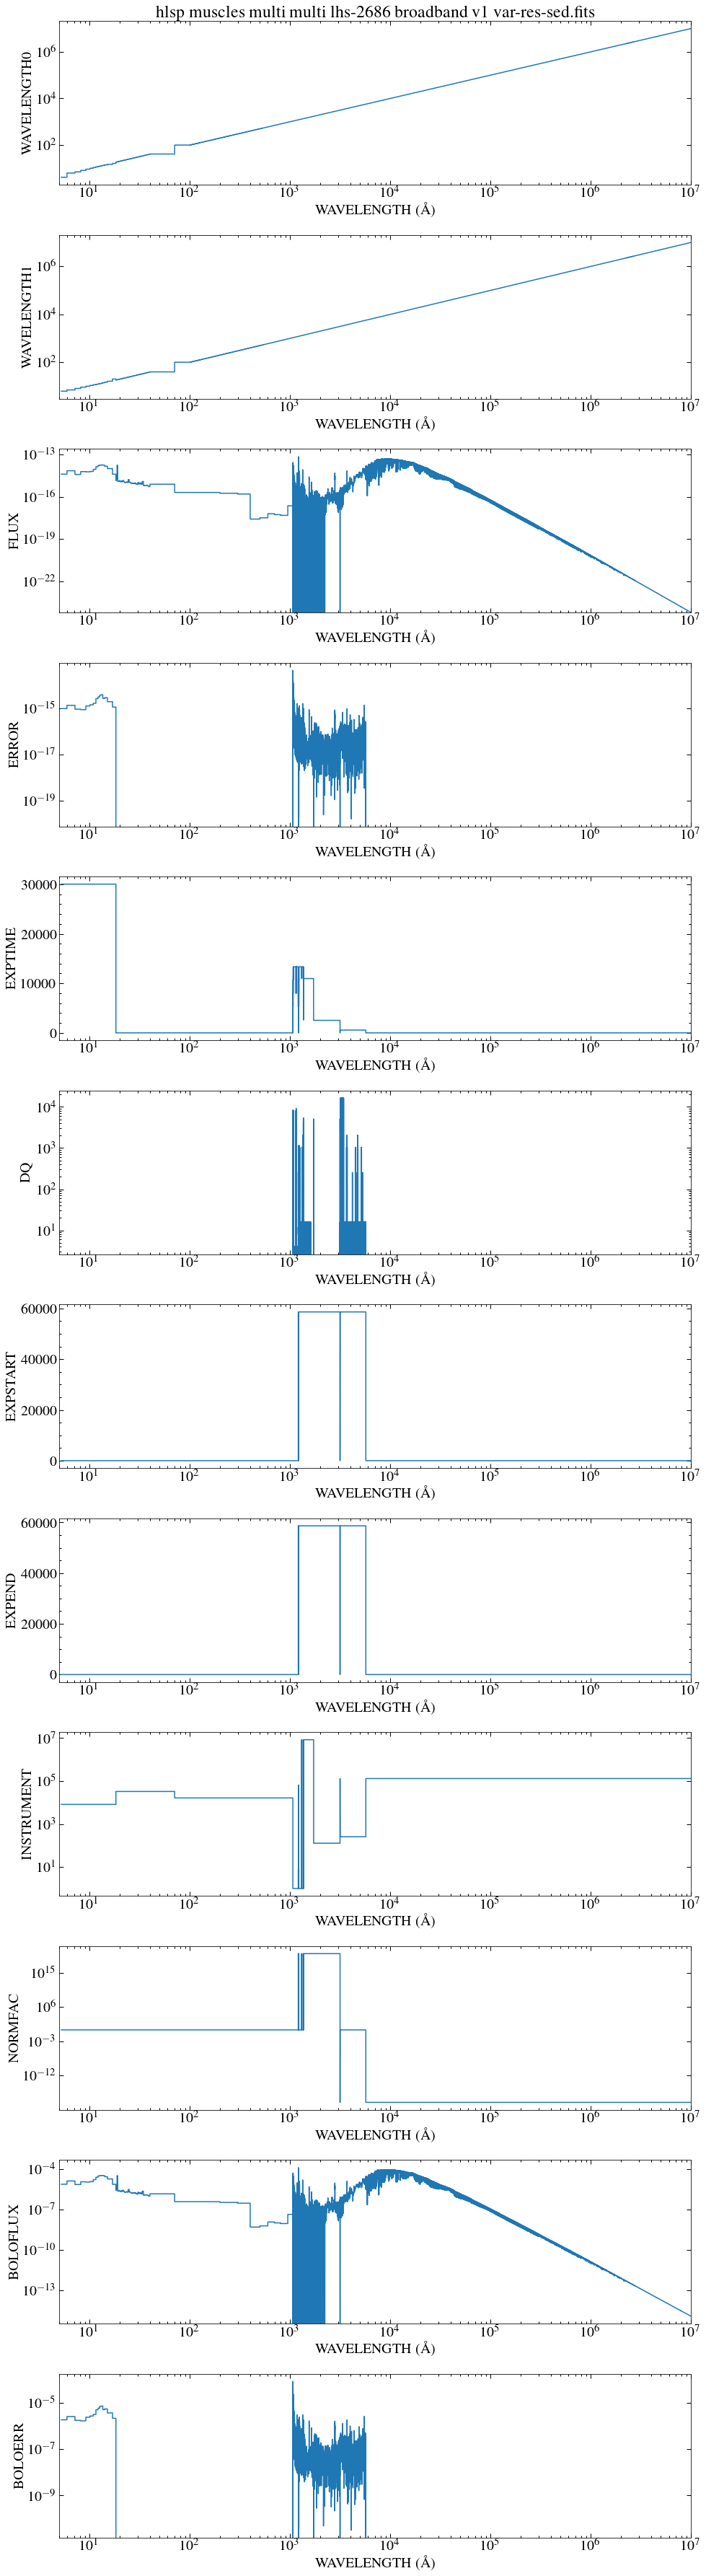

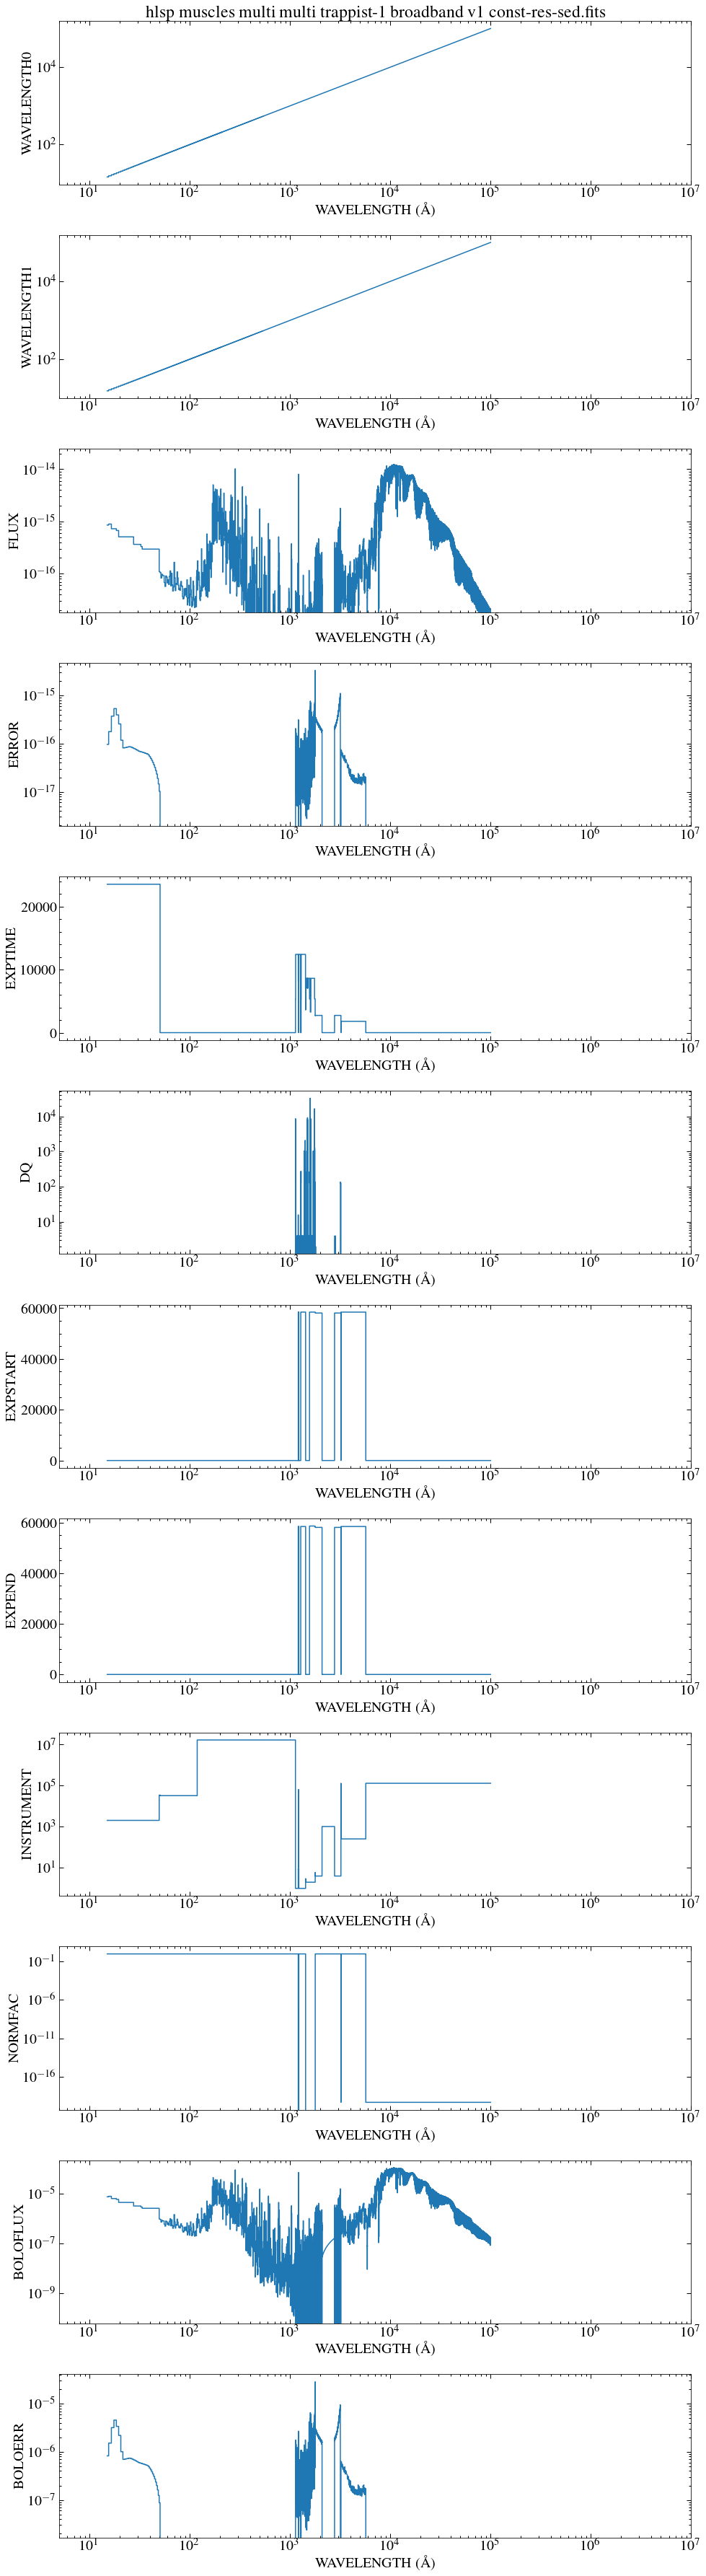

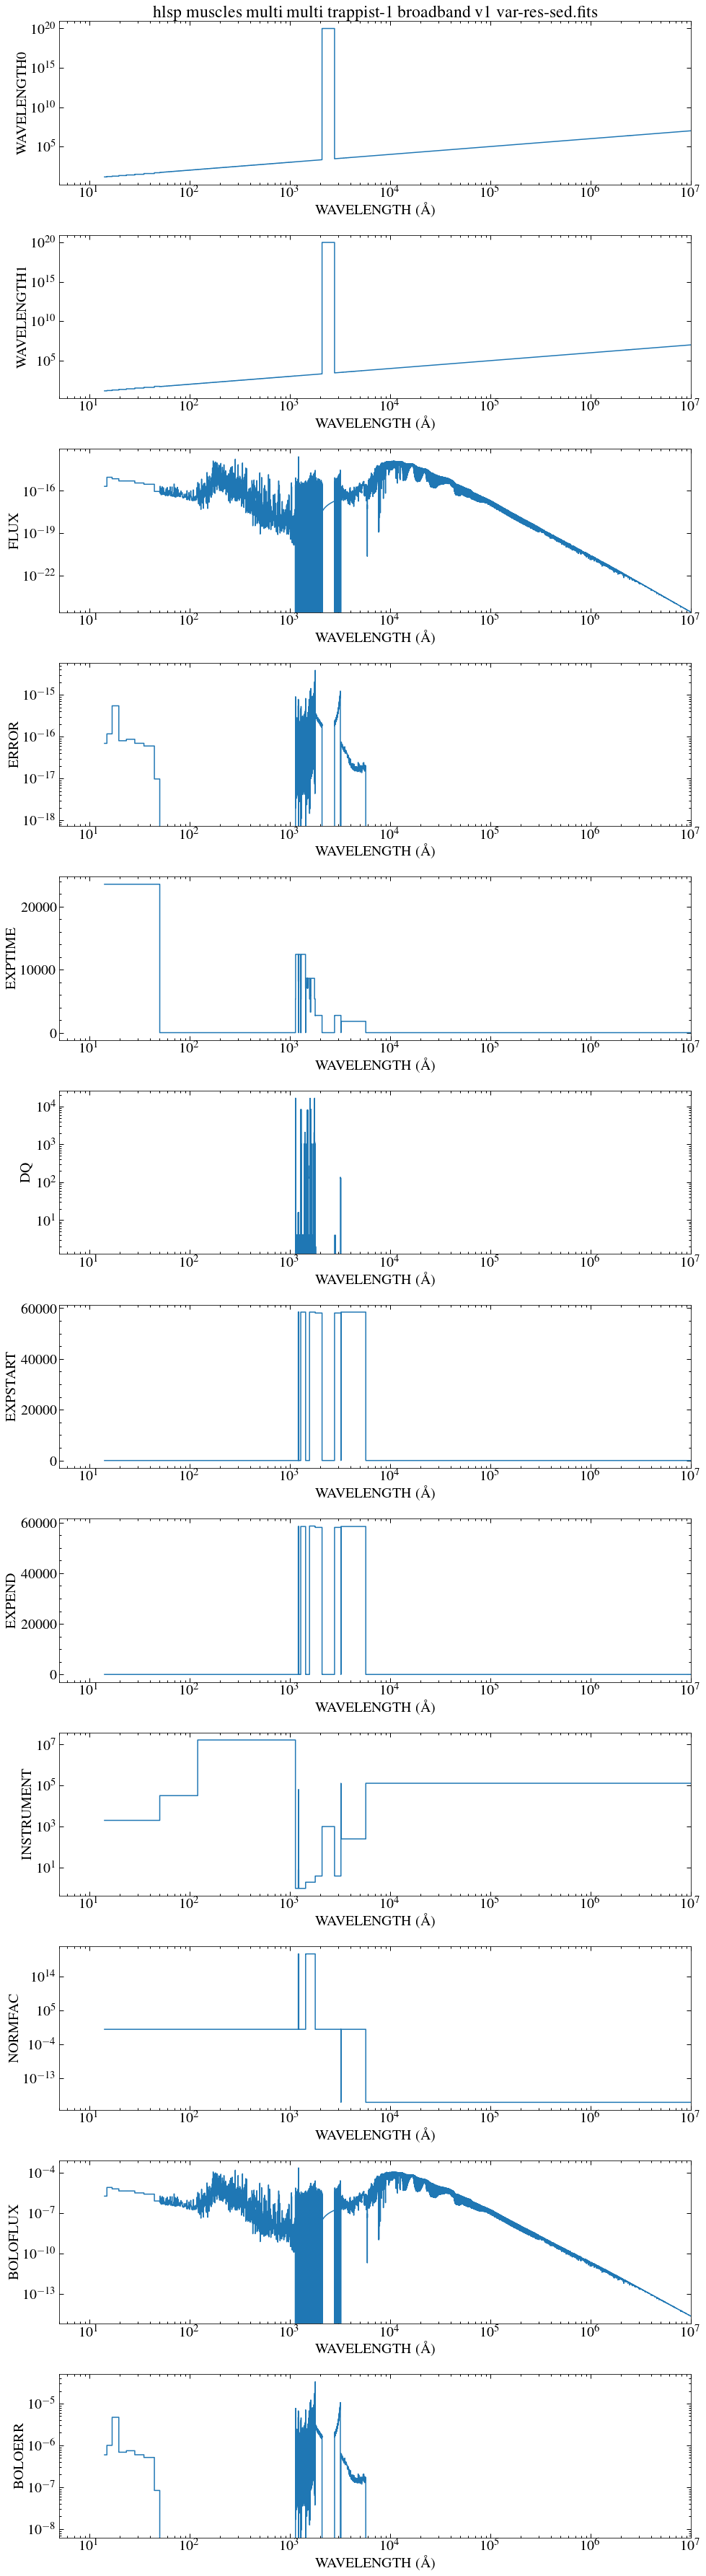

In [17]:
for sed in all_seds:
    plt.figure(figsize=(14, 50))
    filename = os.path.split(sed)[1]
#     if '{}_check.pdf'.format(filename[:-5]) not in done:
    data = fits.getdata(sed, 1)
    for i, name in enumerate(names[1:]):
        plt.subplot(12, 1, i+1)
        if i == 0:
             plt.title(filename.replace('_', ' '))
#              plt.title(filename)
        plt.step(data['WAVELENGTH'], data[name], where='mid')
        plt.xscale('log')
        if name not in ['EXPTIME', 'EXPSTART', 'EXPEND']:
            plt.yscale('log')
        if name == 'FLUX':
            plt.ylim(data[name][-1])
#         if i == len(names)-2:
        plt.xlabel('WAVELENGTH (\AA)')
        plt.ylabel(name)
        plt.xlim(5, 1e7)

    plt.tight_layout()
    plt.savefig('plots/diagnosis_plots/{}_check.pdf'.format(filename[:-5]))
    plt.show()
    plt.close()